# Project Assignment B - Explainer Notebook
## Investigation of the 2016 Rio Olympic Network 
### 02805 Social graphs and interactions

s164519, Julie Fischer Vinther Christensen, <br>
s144549, Katja Steen Salskov-Iversen, <br>
s153631, Mie Frederiksen

***

> Essential imports for this notebook:

In [1]:
# ALL IMPORTS 
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
from fa2 import ForceAtlas2
import io
import re
import nltk, re, pprint
from nltk import word_tokenize
import collections
from collections import Counter
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import copy
from collections import defaultdict
import community
import random
import matplotlib.colors as mcolors
from IPython.display import IFrame
import seaborn as sns
import statistics
sns.set()

# The force atlas algorithm parameters will obtain the visualization we like
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=1.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

# Load the dataframes
df_a = pickle.load(open('df_athletes.txt','rb'))
df_c = pickle.load(open('df_countries.txt','rb'))
df_e = pickle.load(open('df_events.txt','rb'))

# Load the Network
G = pickle.load(open('G.txt','rb'))

# Load colors
cnames = pickle.load(open('cnames.txt','rb'))

# Table of content:
1. [Motivation](#part1)
2. [Basic stats. Let's understand the dataset better](#part2)
3. [Tools, theory and analysis](#part3)
4. [Discussion. Think critically about your creation](#part4)

<hr style="border:0.5px solid gray"> </hr>

# 1. Motivation <a class="anchor" id="part1"></a>
This project will investigate the Olympic Games in Rio 2016 by analyzing the network contained by the participating athletes, countries, and sports. It will investigate what kind of network the Olympic Games is. Furthermore, the project will look into communities of the Olympic Network, and detect what defines the communities. Lastly, the project will investigate the subgraph of the Olympic Network only consisting the athletes. The analysis will continue into analysing the sentiment of the athletes, and in the end, determine who wins medals and who don't. 

This chapter will elaborate on the topic *Investigation of The Olympic Games Rio 2016 Network*. This is done by presenting and motivating the chosen datasets. Further, by explaining the goals of the end-user experience.    

## 1.1 What is your dataset

The Legend says that it was Heracles the son of Zeus and the mortal woman Alcmene, that founded the Olympic Games. The Olympic games have traditionally been held with an increment of fourth years also known as Olympiads [[ref: History of Olympic Games]](https://www.history.com/topics/sports/olympic-games). Long story short the Olympics have been there for centuries growing every fourth year adding more athletes, events and countries. Every fourth year the champions are admired and celebrated around the world. The chosen dataset and their relevant wiki pages will give a more nuanced picture of how the huge Olympic network is connected. Further, investigate how the athletes are connected, and follow our curiosity in the investigating of the medalists. 


To investigate the Rio 2016 Olympic Network three datasets are chosen. The first dataset contains athletes with their names, sex, nationality, sport, physical appearance and if won any medals. The next dataset is country information with population and GDP per capita. The last dataset is events with information such as sports, disciplines and venue. These datasets were obtained at [kaggle.com](https://www.kaggle.com/rio2016/olympic-games). Further, each dataset is enriched with information from Wikipedia. More in-depth explanation about the datasets and the wiki pages will be elaborated in Chapter 2.    


The goal for the end user experience is to create an informative but playful webpage. The end user will also be able to understand the webpage without any preknowledge to network theory. The webpage will have interactive graphs that are displayed in Gephi and visualised on the webpage using the sigmajs exporter plugin [ref](https://gephi.org/). In general, the storyline and the chosen visualisation should awake the user's curiosity and engage them to investigate what they find interesting in relation to the Olympic Games' network. 

<hr style="border:0.5px solid gray"> </hr>

# 2. Basic stats. Let's understand the dataset better <a class="anchor" id="part2"></a>

This chapter will contain a more detailed description of the dataset and the created network. Further explain how the data is gathered, and what is done to improve it. 


This chapter contains the following sections: 

* 2.1 [Getting the Data](#2.1)
* 2.2 [Data Cleaning and Data Scraping](#2.2)
* 2.3 [Understanding the Network](#2.3) 
* 2.4 [Visualisation of the Network ](#2.4)


## 2.1 Getting the Data <a class="anchor" id="2.1"></a>
Data from the 2016 Olympics Games in Rio de Janeiro is used for this project. The data is downloaded from [Kaggle](https://www.kaggle.com/rio2016/olympic-games) and consists of three different datasets with information about athletes, medals, and events from the summer games. Below are the three datasets shortly presented:

Events:
* Size: 20.95 KB
* Rows: 306 events 
* Columns: id, Sport, Discipline, Event Name, Gender of competitors and venue(s).

Contries:
* Size: 7.45 KB
* Rows: 201 contries
* Columns: Country code, population and gdp per capita

Athletes: 
* Size: 747.04 KB
* Rows: 11,538 athletes 
* Columns: Name, nationality, gender, age, height, weight, sport, and quantity of gold, silver, and/or bronze medals.

## 2.2 Data Cleaning and Data Scraping <a class="anchor" id="2.2"></a>
The main goal for the data cleaning process is to create a column with the wiki link for the corresponding Wikipedia webpage. From the wikilink, all the text from the Wikipedia pages can be de downloaded in JSON format. 

The next three subsections will present how the data his cleaned and how the wikilinks are determined for respectively Events, Countries, and Athletes.

**For all the coding for data cleaning, data scraping, and network creation see** [APPENDIX A](https://nbviewer.jupyter.org/github/katjasalskov/2016Olympics/blob/main/OLYMPIC_PROJECT_DATA/APPENDIX_A.ipynb)

### Events
The 306 rows that correspond to different events are grouped by the sports column. This reduces the data frame to 31 different sports. Thereafter a column with each sports wikilink is created. The correct format of the wikilink is the sport combined with the text *'_at_the_2016_Summer_Olympics'.* 

In [2]:
df_e.head()

id                  sport             discipline  \
0   701492               swimming             backstroke   
12  772359                 diving                 diving   
42  492931  synchronised swimming  synchronised swimming   
44  183313             water polo             water polo   
46  177885                archery                archery   

                       name     sex  \
0   Women's 100m Backstroke  female   
12     Women's 10m Platform  female   
42                    Duets  female   
44                    Women  female   
46       Women's Individual  female   

                                               venues  \
0                            Olympic Aquatics Stadium   
12                         Maria Lenk Aquatics Centre   
42                         Maria Lenk Aquatics Centre   
44  Maria Lenk Aquatics Centre, Olympic Aquatics S...   
46                                        SambÌ_dromo   

                                             WikiLink  
0                swimming_at_the_2016_Summer_Olympics  
12                 diving_at_the_2016_Summer_Olympics  
42  synchronized_swimming_at_the_2016_Summer_Olympics  
44             water_polo_at_the_2016_Summer_Olympics  
46                archery_at_the_2016_Summer_Olympics

**The Wikipedia page for an event:**

In [2]:
IFrame("https://en.wikipedia.org/wiki/Sailing_at_the_2016_Summer_Olympics", width = 1000, height = 400)

### Countries:
For creating a column with the correct wikilink the text in the column 'country' is combined with the text *'_at_the_2016_Summer_Olympics'.* All NaN values are removed. After the data cleaning, the countries dataframe consist of 173 rows (173 different countries).

In [4]:
df_c.head()

country code population       gdp_per_capita  \
0          Afghanistan  AFG   32526562  594.323.081.219.966   
1              Albania  ALB    2889167  394.521.758.150.914   
2              Algeria  ALG   39666519  420.603.123.244.958   
5               Angola  ANG   25021974  410.147.215.182.964   
6  Antigua and Barbuda  ANT      91818  137.147.319.616.988   

                                          WikiLink             country2  
0          Afghanistan_at_the_2016_Summer_Olympics          Afghanistan  
1              Albania_at_the_2016_Summer_Olympics              Albania  
2              Algeria_at_the_2016_Summer_Olympics              Algeria  
5               Angola_at_the_2016_Summer_Olympics               Angola  
6  Antigua_and_Barbuda_at_the_2016_Summer_Olympics  Antigua_and_Barbuda

**The Wikipedia page for a country:**

In [3]:
IFrame("https://en.wikipedia.org/wiki/Denmark_at_the_2016_Summer_Olympics", width = 1000, height = 400)

### Athelets:
The Wikilink column for Athletes are a bit more complicated to create. Due to that, the Wikipedia pages for the Athletes is independent of the 2016 Summer Olympics. Further,  the name column from the downloaded Kaggle data is not necessarily the same as the athlete's name on Wikipedia. For example, the athlete *Aaron Brown*'s Wikipedia page name is *Aaron_Brown_(sprinter)*. To find the right wikilinks for athletes, the downloaded Wikipedia pages for every country are used. Every countries Wikipedia page has an overview of all participating athletes in the 2016 Summer Olympics. From this overview, all the correct wikilinks can be found and subsequently be matched with the dataframe. All the athletes Wikipedia pages can be downloaded with these wikilinks as long the athlete has a Wikipedia page.   

Another issue is that some Wikipedia pages are automatically redirected to another page. For example, the wikilink for the athlete *Rebecca Downie* is redirected to the wikilink *Becky_Downie*. This is handled by finding all downloaded Wikipedia pages that consist of the text *'#REDIRECT'* and download the correct Wikipedia page.

Lastly, all NaN values are removed. After the data cleaning of the athlete dataset, the dataframe consists of 5.319 rows (5319 different athletes).

In [6]:
df_a.head()

id           name nationality   sex       dob height weight  \
0  435962603    Aaron Brown         CAN  male   5/27/92   1.98     79   
3  521041435     Aaron Cook         MDA  male    1/2/91   1.83     80   
6   33922579     Aaron Gate         NZL  male  11/26/90   1.81     71   
7  173071782    Aaron Royle         AUS  male   1/26/90    1.8     67   
8  266237702  Aaron Russell         USA  male    6/4/93   2.05     98   

        sport gold silver bronze          name2                WikiLink  
0   athletics    0      0      1    Aaron_Brown  Aaron_Brown_(sprinter)  
3   taekwondo    0      0      0     Aaron_Cook  Aaron_Cook_(taekwondo)  
6     cycling    0      0      0     Aaron_Gate              Aaron_Gate  
7   triathlon    0      0      0    Aaron_Royle             Aaron_Royle  
8  volleyball    0      0      1  Aaron_Russell           Aaron_Russell

**The Wikipedia page for an Athelete:**

In [4]:
IFrame("https://en.wikipedia.org/wiki/Katja_Salskov-Iversen", width = 1000, height = 400)

## 2.3 Understanding the Network <a class="anchor" id="2.3"></a>

Now all the three dataframes are cleaned and have their corresponding link to their wikipedia page and the Network graph can now be created. Every sport, country, and athlete in the three cleaned dataframes are nodes in the graph. The edges in the graph are the wikilinks linking one Wikipedia page to another Wikipedia page. The edges are found by finding all wikilinks on each Wikipedia page. If the wikilink links to a sport, a country, or an athlete in the three dataframes, the wikilink will be added as an edge in the graph. Finally, if the nodes in the graph have degree 0 the node is removed from the graph.

### Size of the network

In [8]:
print(f"The number of nodes in the network: {G.number_of_nodes()}")
print(f"The number of links in the network: {G.number_of_edges()}")

The number of nodes in the network: 5463
The number of links in the network: 16306


The 3 original dataframes had 31 sports, 201 countries, and 11.538 athletes which means that a fully Olympic network should have 11.770 nodes. But due to the data cleaning and the fact that not every athlete has a Wikipedia page. The Network is reduced to 5.463 nodes with 16.306 links. This is still a large network that is highly connected.

### Links connecting the different node types
A Nodetype represents if the node is a sport, a country, or an athlete.

In [9]:
# Find nodetype by the nodes attribute:
Nodetype = nx.get_node_attributes(G,'nodetype')

# Counter
NodetypeLink_count = 0

# Check if there is a link between different nodetypes:
for edge in G.edges:
    if(Nodetype[edge[0]] != Nodetype[edge[1]]):
        NodetypeLink_count  += 1
# Print
print("\n There are " + str(NodetypeLink_count) + " links between the different nodetypes in the network.")        


 There are 9018 links between the different nodetypes in the network.


That means that in 9018 times a node links to another node from a different node type. This indicates that the node types are strongly connected. Due to that, half of all links in the network links to different node types.

### Top most connected nodes

In [10]:
#Find in and out degrees for the network
in_degs = sorted([[G.in_degree(node), node] for node in G.nodes], reverse=True)
out_degs = sorted([[G.out_degree(node), node] for node in G.nodes], reverse=True)

# Pandas dataframe to display
in_degs = pd.DataFrame(in_degs[:5], columns=["In degree", "Node"], index=[i for i in range(1,6)])
out_degs = pd.DataFrame(out_degs[:5], columns=["Out degree", "Node"], index=[i for i in range(1,6)])

# Print:
print("\nTop 5 in-degrees:")
display(in_degs)

print("\nTop 5 out-degrees:")
display(out_degs)


Top 5 in-degrees:


In degree             Node
1         59      Andy_Murray
2         54  Serena_Williams
3         53     Rafael_Nadal
4         48    Fabio_Fognini
5         47        Jack_Sock


Top 5 out-degrees:


Out degree                                       Node
1         513  United_States_at_the_2016_Summer_Olympics
2         432        Germany_at_the_2016_Summer_Olympics
3         330          Japan_at_the_2016_Summer_Olympics
4         326  Great_Britain_at_the_2016_Summer_Olympics
5         323          Italy_at_the_2016_Summer_Olympics

The top 5 in-degrees are all tennis players. The top 5 out-degrees only consist of countries. This is expected due to that each country links to all the athletes competing for that country. Further, the top 5 out-degrees shows some of the countries with the larges numbers of competing athletes with wiki pages. 

### In- and out-degree distributions

To begin with, it is interesting to investigate the total average degree and the median for in- and out-degree.

In [73]:
print(f"The average degree in the network: {sum(d for n, d in G.degree()) / float(G.number_of_nodes())}")
print("")
print(f"The in-degree median in the network: {statistics.median(d for n, d in G.in_degree())}")
print("")
print(f"The out-degree median in the network: {statistics.median(d for n, d in G.out_degree())}")

The average degree in the network: 5.969613765330404

The in-degree median in the network: 2

The out-degree median in the network: 0


The average degree in the Olympic network is 5.97. The average is sensitive to large in and/or out degrees. Therefore it is interesting to study the median for the in- and out-degrees. The median is stable to to nodes with extreme degrees. The median for in-degree is 2, which tells us that most nodes have very few in-degrees. For out-degree, the median is 0, which means that most of the nodes are not linking to other nodes.

#### Scatter plot of in- and out degree
Firstly, it is interesting to investigate a scatter plot of the in- and out degrees. 

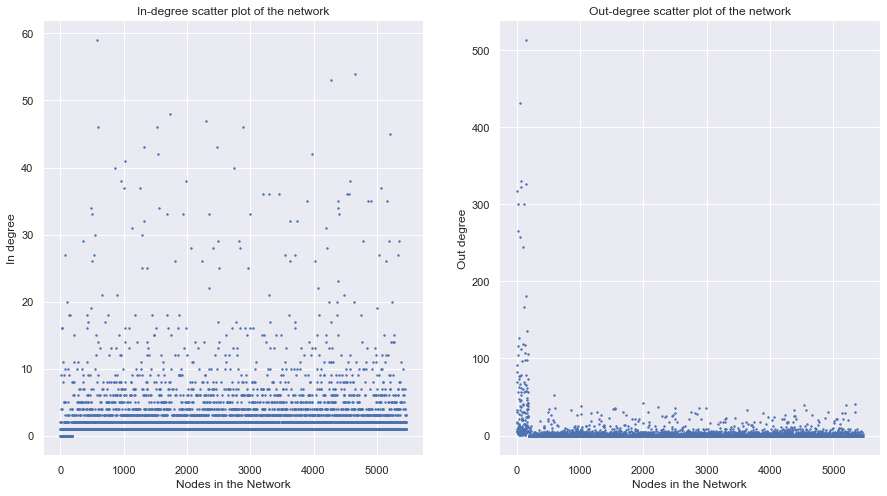

In [11]:
# A scatterplot to compare the in-degrees and the out-degrees
node_number = [i for i in range(len(G.nodes))]
nodes = [node for node in G.nodes]

in_degrees = [G.in_degree(node) for node in G.nodes]
out_degrees = [G.out_degree(node) for node in G.nodes]

# Function
def scatter_plots():
    fig, axs = plt.subplots(1, 2,figsize=(15,8))
    
    axs[0].scatter(node_number, in_degrees, s=2)
    axs[0].set_xlabel('Nodes in the Network')
    axs[0].set_ylabel('In degree')
    axs[0].set_title('In-degree scatter plot of the network')
    axs[1].scatter(node_number, out_degrees, s=2) 
    axs[1].set_xlabel('Nodes in the Network')
    axs[1].set_ylabel('Out degree')
    axs[1].set_title('Out-degree scatter plot of the network')
    
    return axs

axs = scatter_plots()
plt.show()

The scatter plots above show all the network nodes and their respective in-degree and out-degree. The plots show a clear difference in the distribution. The In-degrees have generally a lower number of degrees and is more randomly scattered. The out-degrees have few nodes with a large degree. Next, the outliers in this scatter plot are detected to determine who these outliers are.

#### Outlier detection

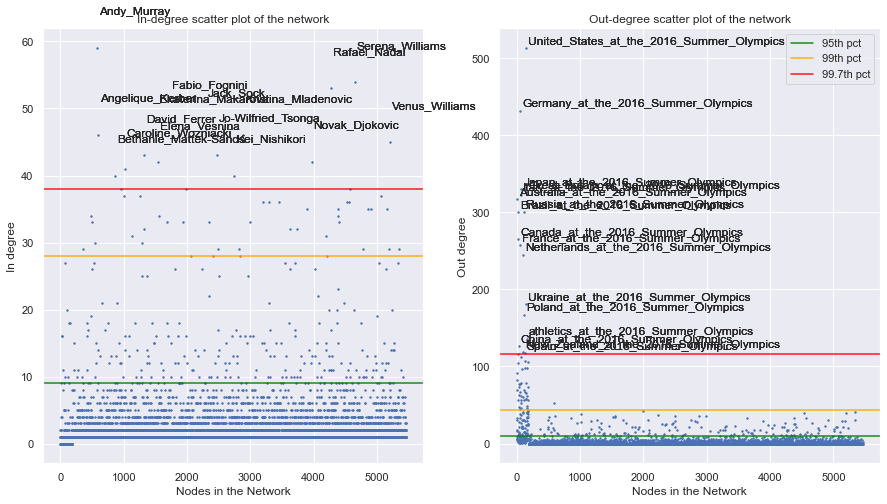

In [12]:
# The high percentiles to explore and give the percentiles a color
percentiles = [95, 99, 99.7] 
color = ["green", "orange", "red"] 

axs = scatter_plots()

# Adding the persent
for i in range(len(percentiles)):
    axs[0].axhline(y=np.percentile(in_degrees, percentiles[i]), c=color[i], xmin=0, xmax=1, alpha=0.9, label=str(percentiles[i])+"th pct")
    axs[1].axhline(y=np.percentile(out_degrees, percentiles[i]), c=color[i], xmin=0, xmax=1, alpha=0.9, label=str(percentiles[i])+"th pct")

    # Add top in-degree labels
    for n in range(len(in_degrees)):
        if in_degrees[n] > np.percentile(in_degrees, 99.7):
            axs[0].text(n+30, in_degrees[n]+5, nodes[n])
   
    # Add top out-degree labels
    for n in range(len(out_degrees)):
        if out_degrees[n] > np.percentile(out_degrees, 99.7):
            axs[1].text(n+30, out_degrees[n]+5, nodes[n])
    
axs[1].legend()
plt.show()

The scatter plots above show where the high percentiles lie in the in-degree and out-degree distribution. The in-degree scatter plot shows that 95% of the nodes have less than 9 in-degrees. Only 0,03% of the nodes have more than 38 in-degrees and these few nodes are all tennis players. For the out-degree, the few nodes that are above the 99,7 percentiles are mostly countries but also the sport *athletics*. The sport athletics has many participants and therefore many out-degrees. These two scatter plots show that both the in- and out-degrees has some extreme outliers that are far from the norm.

Next, the in- and out-degrees will be investigated by a histogram and a log-log distribution. 

#### Histogram and loglog distributions

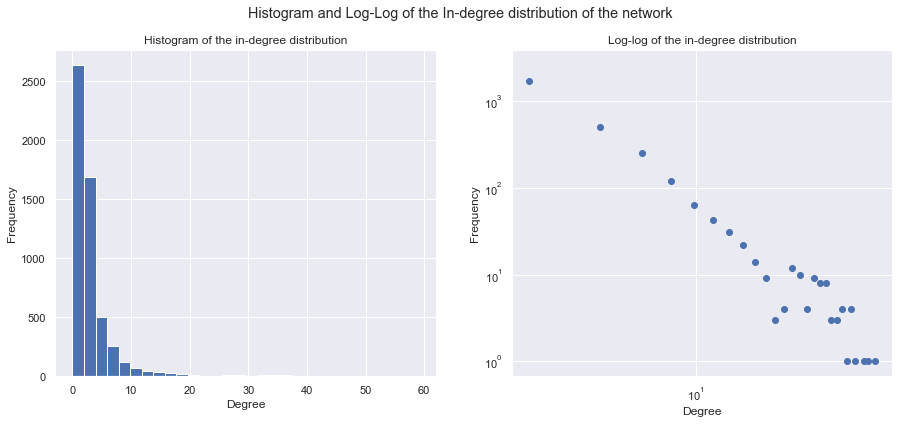

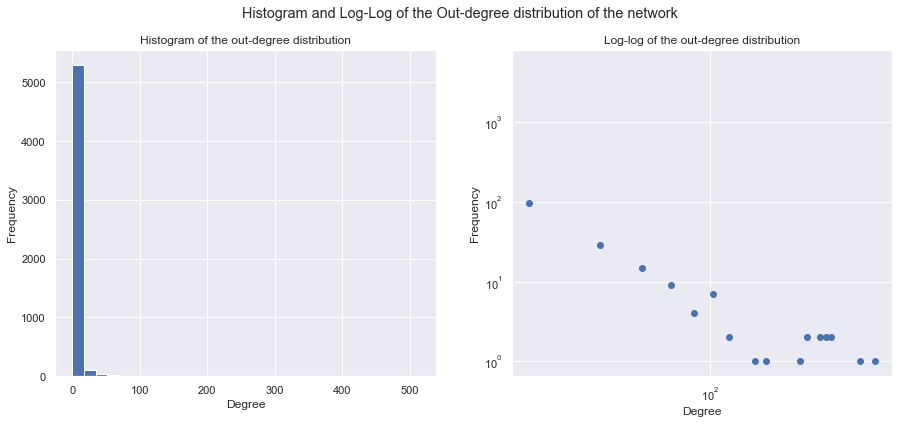

In [13]:
# Function
def Hist_LogLog_dist(G_deg, Print, title):
    degs = [deg for (node, deg) in G_deg]
    hist, bin_edges = np.histogram(degs, bins=30)
    degree_seq = sorted([d for n, d in G_deg], reverse=True)
    degreeCount = collections.Counter(degree_seq)
    deg, cnt = zip(*degreeCount.items())

    fig, axs = plt.subplots(1, 2,figsize=(15,6)) # Side-by-side comparison
    fig.suptitle(title)
    
    # Histogram plot
    axs[0].hist(degs, bin_edges) 
    axs[0].set(ylabel='Frequency', xlabel='Degree')
    axs[0].set_title('Histogram of the {} distribution'.format(Print)) 
    
    # Log-log plot
    axs[1].loglog(bin_edges[:-1], hist, 'bo', markersize=6) 
    axs[1].set_title('Log-log of the {} distribution'.format(Print))
    axs[1].set(ylabel='Frequency', xlabel='Degree');
    
    plt.show()
    
Hist_LogLog_dist(G.in_degree(),  "in-degree", "Histogram and Log-Log of the In-degree distribution of the network")
Hist_LogLog_dist(G.out_degree(), "out-degree", "Histogram and Log-Log of the Out-degree distribution of the network")

The outliers aren't removed and therefore the histogram for especially the out-degrees are hard to investigate. For both the in- and the out-degree distribution most of the nodes have a very small degree. It is instead interesting to investigate the log-log distribution because, when nodes have widely different degrees, a linear plot is unable to display them all. The log-log distribution shows that the Olympic network is a scale-free network and follows a power law. The degrees of the smallest and the largest nodes are widely different and spanning over several orders of magnitude. In contrast, a random network has comparable degrees (http://networksciencebook.com/chapter/4).

## 2.4 Visualisation of the Network <a class="anchor" id="2.4"></a>

The below plot shows the Olympic network with the three different node types, sports (Blue), countries (red), and athletes (green). The size of the nodes depends on the node's degree. 

100%|██████████| 100/100 [00:16<00:00,  6.04it/s]


BarnesHut Approximation  took  2.34  seconds
Repulsion forces  took  13.81  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


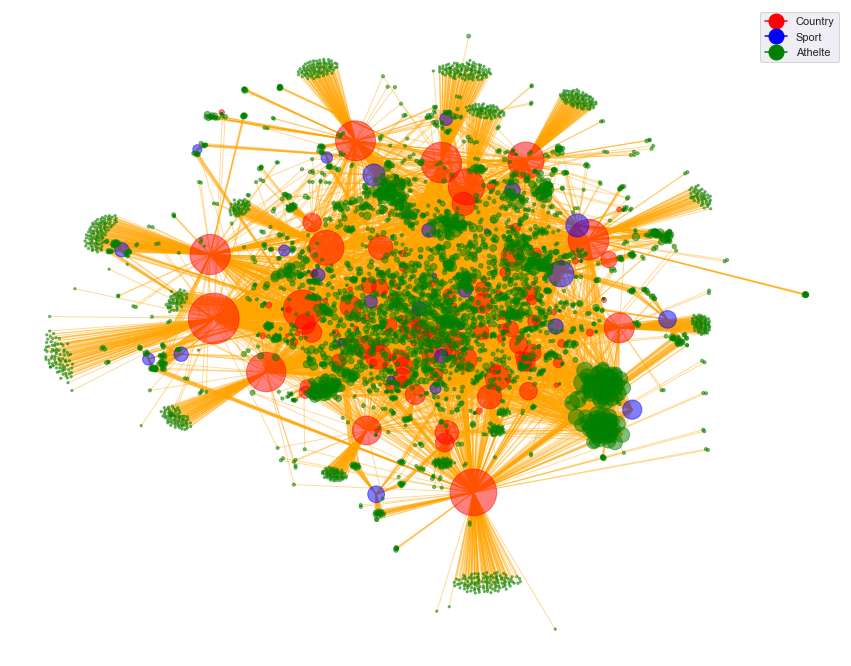

In [14]:
#Convert to an undirected graph
G = G.to_undirected()

# Node color:
node_color = []

# for each node in the graph
for node in G.nodes(data=True):
    # if the node has the attribute contries
    if 'countries' in node[1]['nodetype']:
        node_color.append('red')
    # if the node has the attribute events
    elif 'sports' in node[1]['nodetype']:
        node_color.append('blue')   
    # if the node has the attribute athelets
    else:
        node_color.append('green')
        
# Node-size
G_Degree = [G.degree(i)*5 for i in G.nodes()]

# custom legends
legend_elements = [Line2D([0], [0], marker='o', color='red', label='Country',
                           markersize=15),
                   Line2D([0], [0], marker='o', color='blue', label='Sport',
                           markersize=15),
                   Line2D([0], [0], marker='o', color='green', label='Athelte',
                           markersize=15)]
   

#Show the visualisation
plt.figure(figsize=(15,12))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100)
nx.draw_networkx_nodes(G, positions, node_size = G_Degree, node_color = node_color,  alpha=0.5)
nx.draw_networkx_edges(G, positions, edge_color="orange",alpha=0.4)
plt.legend(handles=legend_elements,loc='upper right')
plt.axis('off')
plt.show()

The Olympic Network shows that the country's nodes (red) are the largest nodes due to the large number of out-degrees.  Each country has many connecting athletes (green) and many of these athletes are only connected to that country.  Whereas, sports (blue) seems to connect different athletes (green) from different countries (red). 

<hr style="border:0.5px solid gray"> </hr>

# 3. Tools, Theory and Analysis. <a class="anchor" id="part3"></a>

Chapter 3 will analyse the Olympic network and the wikitexts. Further, explain and discuss the applied tools. 

This chapter consist of the following sections: 

* 3.1 [Analysis of the Olympic Network](#3.1) 
    * 3.1.1 Analysis of communities in the Olympic Network
* 3.2 [Analysis of subnetwork that only consists of Athletes](#3.2)
    * 3.2.1 Analysis of communities in the athletes network
    * 3.2.2 Sentiment analysis athletes network
* 3.3 [Exploratory analysis of segment and communities in regard to medalists](#3.3)


## 3.1  Analysis of the Olympic Network <a class="anchor" id="part3"></a>
This section will detect the communities for the entire Olympic network. Thereafter their corresponding wordclouds will be investigated.   

### 3.1.1 Communities in the Olympic Network
Now let's investigate the communities of the athletes. 
A community is a locally dense connected subgraph in a network. This expectation relies on two distinct hypotheses [Network (science book, chapter 9](http://networksciencebook.com/chapter/9#basics)):
* *Connectedness Hypothesis*

Here each community corresponds to a connected subgraph. This implies that all nodes in the community are connected and that if a network consists of two isolated components,  each community is limited to only one component. 

* *Density Hypothesis*

Nodes in a community are more likely to connect to other members of the same community than to nodes in other communities. 

To find the communities, the goal is to maximize intra-community edges while minimizing inter-community edges. Formally, the following algorithm tries to maximize the modularity of the network or the fraction of edges that fall within the community minus the expected fraction of edges if the edges were distributed by random. Good communities should have a high number of intra-community edges, so by maximizing the modularity, we detect dense communities that have a high fraction of intra-community edges. 


The Networkx function best_partition is used for our giant component ([ref](https://python-louvain.readthedocs.io/en/latest/api.html
)). 
Best_partition is based on the Louvain algorithm. Optimizing the modularity will theoretically result in best possible communities, but in reality, the large networks will make it impractically. Therefore a heuristics approach are used to find a satisfying solution. More specific the Lovain algorithm first finds small communities by locally optimizing all nodes modularity. Thereafter, each small community are grouped into one. This is repeated until a satisfying result is reached. In practice, this means that the clusters can change every time the algorithm is run ([ref](https://en.wikipedia.org/wiki/Louvain_method)).

In [15]:
# Identify the communitity by using the "best partition" algorithmn.
partition = community.best_partition(G, weight='weight', resolution=1.0, randomize=False, random_state=False)
print(f"Number of communities: {len(set(partition.values()))}")


Number of communities: 28


Create a dataframe with the community number and add dataframe as attributes to the Giant graph: 

In [16]:
#Creating datafreme with partition numbers: 
d = pd.DataFrame.from_dict(partition,orient='index')
d.reset_index(inplace=True)
d = d.rename(columns = {'index':'WikiLink',0:'ComNo'})

#Add ComNo as attributes to graph
node_attr_ComNo = d.set_index('WikiLink').to_dict('index')
nx.set_node_attributes(G, node_attr_ComNo)

# Add ComNo to the 3 dataframes
#Merging the three universes, athletes, countries and sport with their community numbers. 
d_a = d.merge(df_a, on='WikiLink', how='inner')
d_c = d.merge(df_c, on='WikiLink', how='inner')
d_e = d.merge(df_e, on='WikiLink', how='inner')

nx.write_gexf(G, "G_com.gexf")

The distribution of each community is plotted, to investigate the size of all the communities. The size of the community is defined by how many nodes there are in each community.

The size of the communities are: [527, 446, 428, 392, 384, 370, 309, 299, 297, 264, 234, 226, 217, 211, 140, 104, 99, 92, 73, 70, 65, 61, 53, 39, 19, 17, 15, 12]


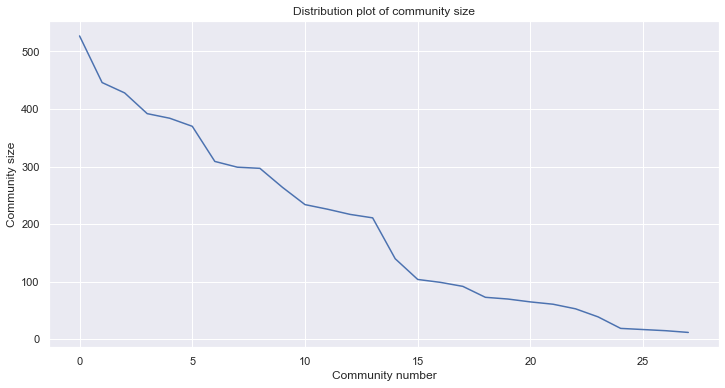

In [17]:
G_com_dist = list(d['ComNo'].value_counts())
print(("The size of the communities are: " + str(G_com_dist)))

plt.figure(figsize=[12,6])
plt.plot(range(len(G_com_dist)),G_com_dist )

plt.ylabel('Community size')
plt.xlabel('Community number') #not the real ComNo, just the size number
plt.title('Distribution plot of community size')
plt.savefig('comsizedist.jpg')

plt.show()

In [18]:
comthree = sum(G_com_dist[:3])/sum(G_com_dist)*100
print(f'Top three largest communities are counting for %d procent of the nodes'%(comthree))

Top three largest communities are counting for 25 procent of the nodes


On the above plot,  the size of the 27 communities can be seen. Top three communities are big and stand for 25% of all the nodes, and the curve is slowly flattening out, where only 25 and 12 nodes respectively are in the two smallest communities. Be aware that the x-axis are not showing the real community number, but just the order of the community sizes going from the biggest community (0) to the largest (27).

Now the network can be plotted again, this time with different colors depending on their community: 

100%|██████████| 100/100 [00:15<00:00,  6.59it/s]


BarnesHut Approximation  took  2.30  seconds
Repulsion forces  took  12.47  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


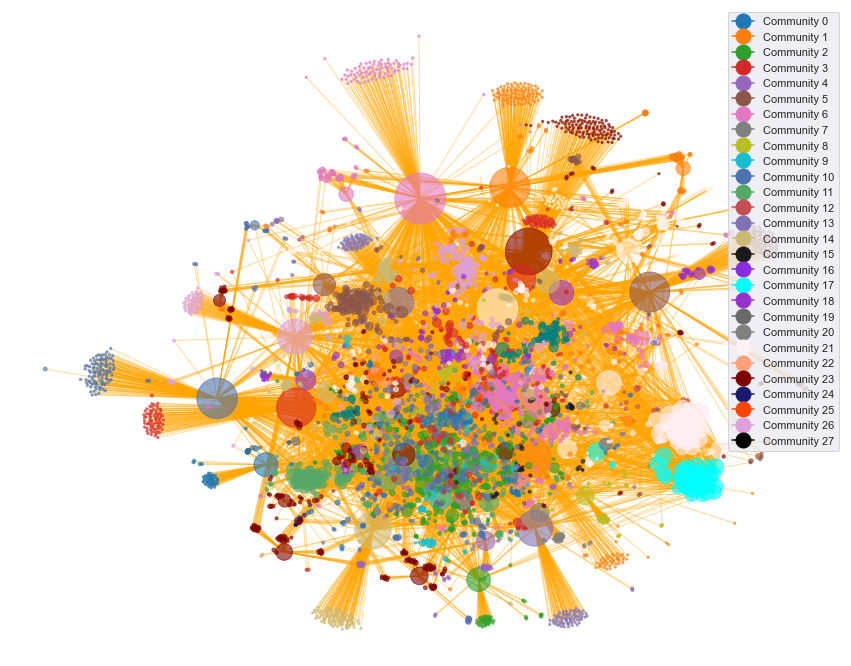

In [19]:
# List of colors
cnames = pickle.load(open('cnames.txt','rb'))

#Generete a list with the used colors in the network graph
node_c =[]
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[0])
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[9])
node_c.append(list(mcolors.BASE_COLORS.keys())[0]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[1]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[2]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[4]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[5]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[6])    
node_c.append(list(cnames.values())[10])
node_c.append(list(cnames.values())[20])  
node_c.append(list(cnames.values())[30]) 
node_c.append(list(cnames.values())[40]) 
node_c.append(list(cnames.values())[50]) 
node_c.append(list(cnames.values())[60])
node_c.append(list(cnames.values())[70])
node_c.append(list(cnames.values())[80]) 
node_c.append(list(cnames.values())[90]) 
node_c.append(list(cnames.values())[100])
node_c.append(list(cnames.values())[110])
node_c.append('black')

#Node color
node_color = []

# for each node in the graph
for node in G.nodes(data=True):
    # if the node has the attribute contries
    if 0 == node[1]['ComNo']:
        
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[0])
        
    elif 1 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
    elif 2 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
    elif 3 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
    elif 4 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
    elif 5 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
    elif 6 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
    elif 7 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
    elif 8 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
    elif 9 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[9])
    elif 10 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[0]) 
    elif 11 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[1]) 
    elif 12 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[2]) 
    elif 13 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[4]) 
    elif 14 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[5]) 
    elif 15 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[6])    
    elif 16 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[10]) 
    elif 17 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[20])  
    elif 18 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[30]) 
    elif 19 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[40]) 
    elif 20 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[50]) 
    elif 21 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[60])
    elif 22 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[70]) 
    elif 23 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[80]) 
    elif 24 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[90]) 
    elif 25 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[110])
    elif 26 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[120]) 
    

    else:
        node_color.append(list(cnames.values())[130])
        
# Node-size
G_Degree = [G.degree(i)*5 for i in G.nodes()]
    
        
# custom legends
legend_elements = [Line2D([0], [0], marker='o', color=node_c[0], label='Community 0',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[1], label='Community 1',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[2], label='Community 2',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[3], label='Community 3',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[4], label='Community 4',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[5], label='Community 5',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[6], label='Community 6',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[7], label='Community 7',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[8], label='Community 8',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[9], label='Community 9',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[10], label='Community 10',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[11], label='Community 11',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[12], label='Community 12',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[13], label='Community 13',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[14], label='Community 14',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[15], label='Community 15',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[16], label='Community 16',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[17], label='Community 17',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[18], label='Community 18',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[19], label='Community 19',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[20], label='Community 20',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[21], label='Community 21',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[22], label='Community 22',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[23], label='Community 23',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[24], label='Community 24',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[25], label='Community 25',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[26], label='Community 26',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[27], label='Community 27',
                           markersize=15)]
         
#Show the visualisation
plt.figure(figsize=(15,12))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100)
nx.draw_networkx_nodes(G, positions, node_size = G_Degree,  node_color = node_color,  alpha=0.6)
nx.draw_networkx_edges(G, positions, edge_color="orange",alpha=0.4)
plt.axis('off')
plt.legend(handles=legend_elements,loc='upper right')
plt.savefig('athletecom.jpg')
plt.show()
        

The community colored Network is not too easy to interpret, however, some dense clusters of nodes are defined as communities. Furthermore, it is easy to see that the athletes from the same country are in community together, also with their respective country node.

#### Term Frequency distribution

From the above analysis, there was some big communities and also some small once. It is interesting to investigate these communities and figure out what they have in common.  The wiki pages for the network will therefore be investigated more in-depth to find themes for each community.  Term frequency is calculated to investigate the importance of words in the Wikipedia pages for the network. This can be used to find the most common words and interpretation of the content for each community. 

The below code gets all the saved Wikipedia files, cleans them up (remove stopwords, punctuations etc), and then count the words in each text. It is chosen to use the *TF log normalization* since the length of the texts within the network varies a lot. As an example, the text of a famous athlete such as Usan Bolt is 230759 words long, whereas an unknown athlete such as Katja Salskov-Iversen is 2104 words long. 
When using the *TF log normalization* the term frequency is getting logarithmic weights, which is also great for the speed of both the TF algorithm and the IDF algorithm, since these numbers are much smaller and hence shorter running time. The formula can be seen below ([ref](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)).  

$\log(1+f_{{t,d}})$    
(Where $f_{t,d}$ is the raw count TF)


In [20]:
# Function to create the TF_lists:
def TFList(df, nodetype, ComNo):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        if df['ComNo'].iloc[i] == ComNo:
            Node = df['WikiLink'].iloc[i]                            # Open the page file
            f += io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    tf_w = copy.deepcopy(FreqWord)# Copy the dictionary
    
    # Calculate a log normalization to the frequency
    for key, value in FreqWord.items():
        w = np.log(1 + value)
        tf_w[key] = w
    
    # Return tf_w, TF and list of words:
    return tf_w, words


Thereafter the TF-list function is runned.

In [21]:
# Number of communities:
NC = len(set(partition.values()))

# Create the TFLIST and wordlist for all communities:
TFListCom = []
Words = []
for i in range(NC):
    TFListCom.append(TFList(d_a, 'athletes_', i)[0])
    Words.append(TFList(d_a, 'athletes_', i)[1])
    
# Run for countries
for i in range(NC):
    TFListCom.append(TFList(d_c, 'countries_', i)[0])
    Words.append(TFList(d_c, 'countries_', i)[1])

# Run for events 
for i in range(NC):
    TFListCom.append(TFList(d_e, 'events_', i)[0])
    Words.append(TFList(d_e, 'events_', i)[1])

Following print top five words for each community for the log normalize TF: 

In [22]:
for i in range(NC):
    print("Top 5 TF for community %d:"%i)
    print(list({k: v for k, v in sorted(TFListCom[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

Top 5 TF for community 0:
[('category', 7.7354333524996886), ('championships', 7.558516743045645), ('2016', 7.2875606403097235), ('world', 7.261927092702751), ('ref', 7.195187320178709)]

Top 5 TF for community 1:
[('category', 8.32579052588609), ('world', 8.165647925297504), ('championships', 8.084254106307318), ('european', 8.001355025826703), ('summer', 7.851271997109883)]

Top 5 TF for community 2:
[('category', 8.463792414689122), ('championships', 8.161375023197486), ('2016', 7.9291264873067995), ('world', 7.9102237070973445), ('games', 7.869783902530146)]

Top 5 TF for community 3:
[('championships', 8.342601680684194), ('category', 8.278428259199071), ('american', 8.103191752285786), ('world', 8.072779333169498), ('ref', 8.0323601479245)]

Top 5 TF for community 4:
[('american', 7.188412736496954), ('category', 6.824373670043086), ('pan', 6.54965074223381), ('championships', 6.53813982376767), ('games', 6.52649485957079)]

Top 5 TF for community 5:
[('world', 8.77971129020447),

By looking at the term frequency for each community, the top five words for each community already tell a lot about the specific community. As an example, community 27 might have many of the "gymnastic" athletes. However, words such as "world", "championships" and "ref" appears in lots of the community top five. Hence IDF is calculated. 

*Inverse document frequency* is a measure of hos much information the word provides. The function takes all documents into account, and calculate the relative importance. It is the logarithmically scaled inverse fraction of the documents that contain the words. This is done by dividing the total number of documents by the number of documents containing the term, and afterwards taking the logarithm of that. [wiki](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)  

IDF are calculated using following formula:

 ${\displaystyle \log \left({\frac {N}{1+n_{t}}}\right)+1}$

 Where:

 N = Total number of Communities

 $n_{t}$ = The number of communities containing the term t.

Furthermore, the TF-IDF is calculated, to make sure that the TF is weighted to scale words that are rare higher, and words that appear in each document, lower  [wiki](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). 
 ${\displaystyle \mathrm {TFIDF} (t,d,D)=\mathrm {TF} (t,d)\cdot \mathrm {IDF} (t,D)}$   
 
Both IDF and TF-IDF are calculated below: 

In [23]:
#Function to create the TF-IDF_List for each community.
def TF_IDFList(TFList, wordList):
    
    #creating empty dictionary:
    n_t = defaultdict(int)

    #Counting n_t for each word:
    for community_word_list in wordList:
        for word in set(community_word_list):
            n_t[word] += 1
    
    # Copy dictionary:
    IDF = copy.deepcopy(n_t)
    
    # Calculate the IDF-value for each word:      
    for key, value in n_t.items():
        IDF_value = np.log(len(wordList)/(value+1))+1
        IDF[key] = IDF_value
    
    # Copy dictionary:
    TF_IDF = copy.deepcopy(TFList)
    
    # Now calculating TF-IDF by multiplying TF-value and IDF-value in the dictionary: 
    for dic in range(len(TFList)):
        for key, value in TFList[dic].items(): #looking at the TF lists
            for key1, value1 in IDF.items(): #Lokking at the IDF dict
                if key == key1: #check if the keys are equal
                    new_value = np.dot(value, value1) #Calculating the value. 
                    TF_IDF[dic][key] = new_value #replacing the value
    return TF_IDF

# Create the TF-IDF List for all communities:
TF_IDF = TF_IDFList(TFListCom, Words)


In [24]:
for i in range(NC):
    print("top 5 TF_IDF for community %d:"%i)
    print(list({k: v for k, v in sorted(TF_IDF[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

top 5 TF_IDF for community 0:
[('lariba', 16.58645752571355), ('aminu', 16.491691682534096), ('drinkhall', 16.491240406897752), ('barbuda', 15.902356992769628), ('uaap', 15.614586186886982)]

top 5 TF_IDF for community 1:
[('belgorod', 17.81932351640528), ('fiamme', 15.736375400006303), ('polo', 15.6303103504794), ('imboden', 15.117088635944224), ('hoxha', 14.734682636832886)]

top 5 TF_IDF for community 2:
[('yes2', 22.775562403149006), ('dershwitz', 18.150441169483813), ('algerian', 15.563272900041577), ('armenian', 15.080550791089795), ('aleksanyan', 15.019625547888516)]

top 5 TF_IDF for community 3:
[('neymar', 21.18001586887951), ('omegatiming', 20.3191974910044), ('marquinhos', 18.78434320113574), ('psg', 18.705806317189055), ('cbda', 17.281094677542686)]

top 5 TF_IDF for community 4:
[('suhr', 16.124337655600968), ('argentine', 15.37358866837341), ('arg', 14.582915199930683), ('fh', 14.516141632368056), ('murer', 13.900594948272783)]

top 5 TF_IDF for community 5:
[('fdffe7', 

#### Word clouds for each community

The TF-IDF can now be investigated more in-depth. An easy and intuitive way is to create word clouds so that the most meaningful words appear as the biggest words in the word cloud.  

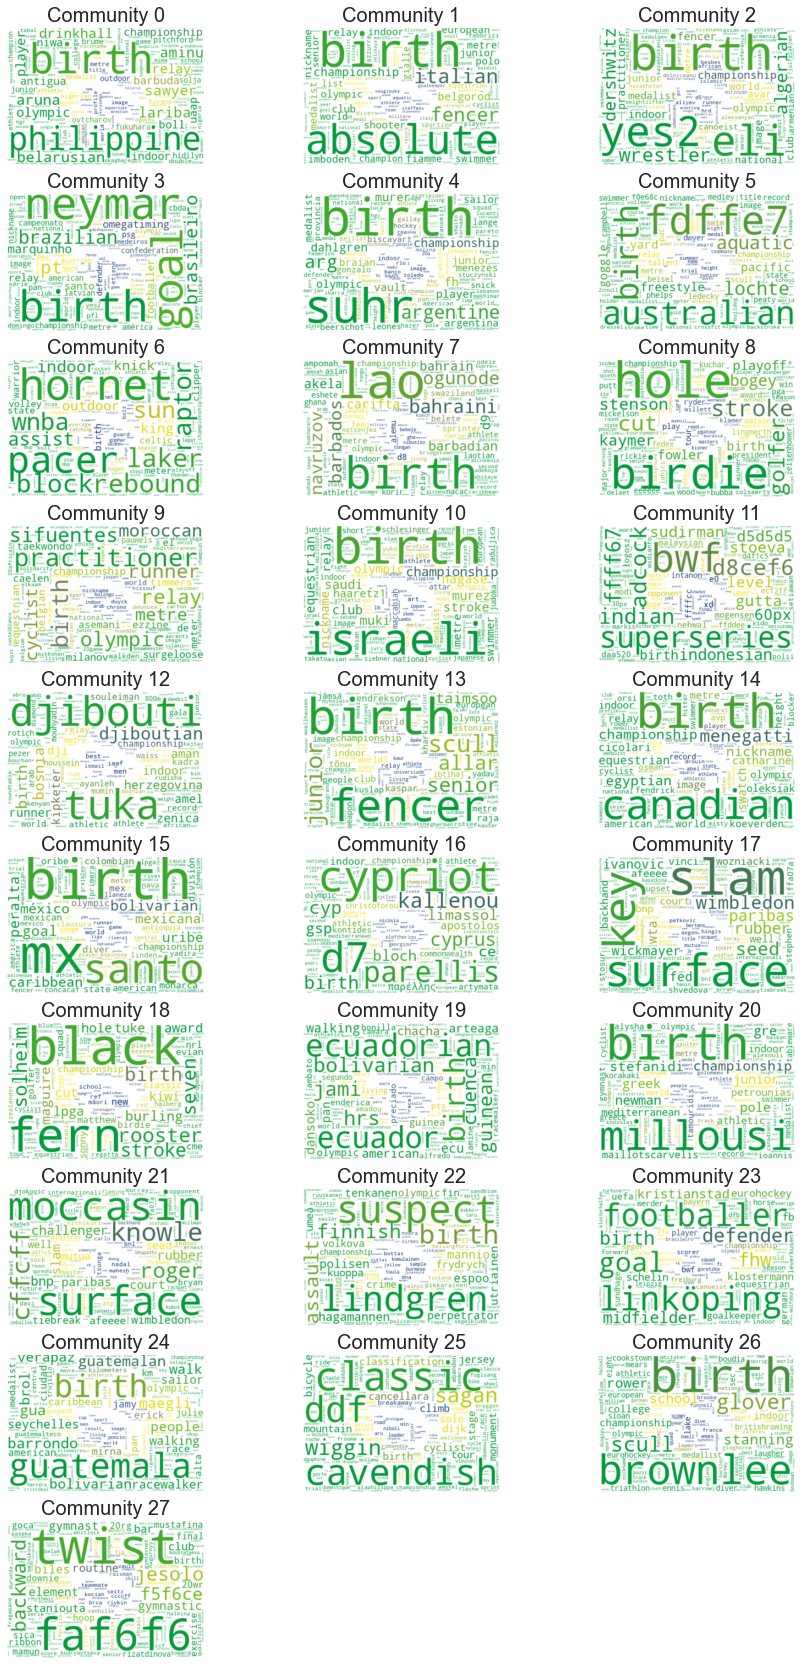

In [25]:
flag = np.array(Image.open("flag.PNG"))
Communitie_WordCloudList = []
athletes_com_wordcloud = []
#Generate the wordclouds: 
for i in range(NC):
    Communitie_WordCloudList.append(' '.join([word for word in list(TF_IDF[i].keys()) for j in range(int(TF_IDF[i][word]))]))
for i in range(NC):
    athletes_com_wordcloud.append(WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 50,
                            width = 800, 
                            height = 400,
                            mask=flag,
                             
                            ).generate(Communitie_WordCloudList[i]))

# Generate a single figure
plt.figure(figsize=(15,30))
image_colors = ImageColorGenerator(flag)
for i in range(NC):
    # Display the wordcloud:
    
    plt.subplot(10,3, i+1)
    plt.imshow(athletes_com_wordcloud[i].recolor(color_func=image_colors), interpolation="bilinear", )
    plt.title('Community %d'%i,fontsize=20,ha='center')
    
    plt.axis("off")
    
plt.savefig('wordC.jpg')

Looking at the word clouds for each community, there is no clear tendency. What is the most eye-catching is the *birth* word presented is quite a lot of the word clouds. Why? Looking at the Country Wikipedia pages, all of the pages have *date of birth* as a column name in a table of the athletes representing their country at Rio 2016. The idea behind IDF is, that it should put weight on such words so that it would not appear as important. However, the country nodes in the network only stand for a small percentage of the full network (11%), hence the word birth is actually presented in few pages, and therefore gets a high weight. For all the athletes, the birth information is having the tiltle *born* instead of *birth*.

Further, as seen in the community plot of the network, the communities seem to be defined by the common nationality that the athletes have. As an example, this might be the case for community 0 (Philippine) and community 5 (Australia). Lastly, some of the communities also seem to have the sport in common, however, this is difficult to say.  

This result leads to wondering. Does it make sense to create word clouds and communities on athletes, countries, and sport as *one* category of node? Maybe it would be more insightful to only analyze the athletes, and detect how these are grouped into communities. The project has chosen to go in this direction both because of the above reasons, but also because of the size of the network. The next analysis becomes much faster in running time when the network is more limited. 


## 3.2 Athletes sub network <a class="anchor" id="3.2"></a>

This section will look into the isolated Athletes network, to discover insightful knowledge of the Rio 2016 athletes. How are the athletes divided into communities? What do they have in common? How many communities are there? And who are the big once, and who are the small once? Are the size of the community reflecting the sport?

### 3.2.1 Communities in the Athletes Network

In [100]:
# Re load the total Graph 
G = pickle.load(open('G.txt','rb'))
 
# create a network for Athletes
nodes = (n for n, data in G.nodes(data=True) if (data.get("nodetype") == 'athletes'))
G_aT = G.subgraph(nodes)
print(f"The number of nodes in the network: {G_aT.number_of_nodes()}")
print(f"The number of links in the network: {G_aT.number_of_edges()}")

The number of nodes in the network: 5279
The number of links in the network: 7232


100%|██████████| 100/100 [00:19<00:00,  5.26it/s]


BarnesHut Approximation  took  5.34  seconds
Repulsion forces  took  13.14  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.22  seconds


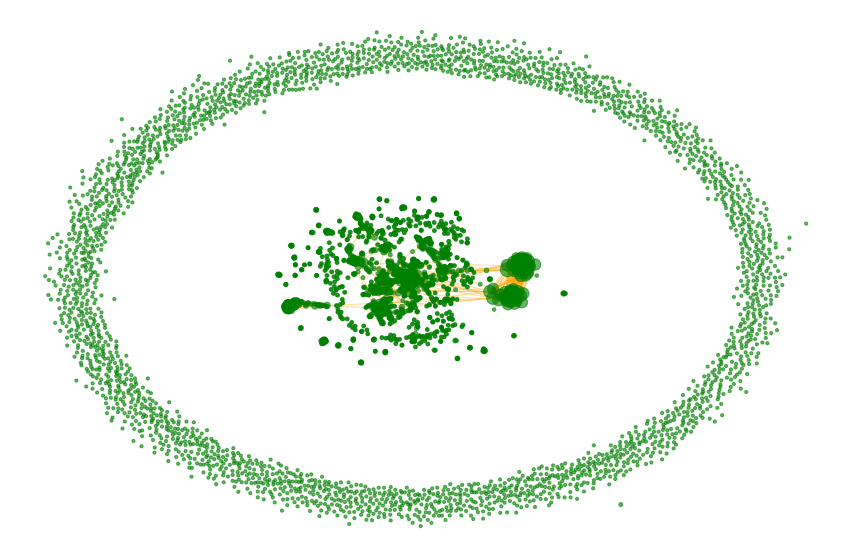

In [101]:
#Convert to an undirected graph
G_aT = G_aT.to_undirected()

# Node-size
G_aT_Degree = [G_aT.degree(i)*3+10 for i in G_aT.nodes()]
          
#Show the visualisation
plt.figure(figsize=(15,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_aT, pos=None, iterations=100)
nx.draw_networkx_nodes(G_aT, positions, node_size = G_aT_Degree, node_color = "green",  alpha=0.6)
nx.draw_networkx_edges(G_aT, positions, edge_color="orange",alpha=0.4)
plt.axis('off')
plt.savefig('atletnetwork.jpg')
plt.show()

From the above, it can be seen that many of the athletes are not connected to any other athletes. A reason could be that athletes Wikipedia pages were not found if their name from the dataset to their the Wikipedia page were different. Another course could be that this only reflects connections on Wikipedia and some athletes don't have Wikipedia pages.  Next, the giant component is investigated. 

In [103]:
# Re load the total Graph 
G = pickle.load(open('G.txt','rb'))
 
# create a network for Athletes
nodes = (n for n, data in G.nodes(data=True) if (data.get("nodetype") == 'athletes'))
G_a = G.subgraph(nodes)

largest_cc = max(nx.weakly_connected_components(G_a), key=len)
G_a = G_a.subgraph(largest_cc).copy()
print(f"The number of nodes in the network: {G_a.number_of_nodes()}")
print(f"The number of links in the network: {G_a.number_of_edges()}")

The number of nodes in the network: 1338
The number of links in the network: 5947


Lets plot it again: 

100%|██████████| 100/100 [00:02<00:00, 34.25it/s]


BarnesHut Approximation  took  0.85  seconds
Repulsion forces  took  1.94  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


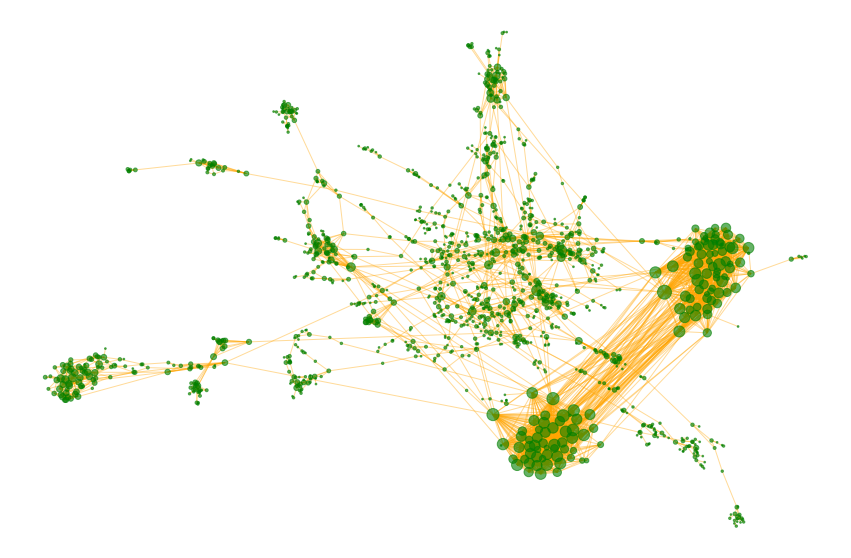

In [104]:
#Convert to an undirected graph
G_a = G_a.to_undirected()

# Node-size
G_a_Degree = [G_a.degree(i)*3 for i in G_a.nodes()]
    
#Show the visualisation
plt.figure(figsize=(15,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_a, pos=None, iterations=100)
nx.draw_networkx_nodes(G_a, positions, node_size = G_a_Degree, node_color = "green",  alpha=0.6)
nx.draw_networkx_edges(G_a, positions, edge_color="orange",alpha=0.4)
plt.savefig('atletGC.jpg')
plt.axis('off')
plt.show()

The plot shows the Giant component of the athlete's network. We can already now see that this is a social network, were easy to spot communities are visualized. The two dense clusters of nodes are especially interesting to further investigate. 

In [105]:
# Identify the communities. Chosen algorithm is "best partition".
partition = community.best_partition(G_a, weight='weight', resolution=1.0, randomize=False, random_state=False)
print(f"Number of communities: {len(set(partition.values()))}")

Number of communities: 23


Add community number to data frame and add the data frame as attributes to the subgraph. 

In [106]:
d = pd.DataFrame.from_dict(partition,orient='index')
d.reset_index(inplace=True)
d = d.rename(columns = {'index':'WikiLink',0:'ComNo'})
d_a = d.merge(df_a, on='WikiLink', how='inner')

#ADD data from dataframe as attributes to graph
node_attr = d_a.set_index('WikiLink').to_dict('index')
nx.set_node_attributes(G_a, node_attr)

The distribution of each community is plotted, to investigate the size of all the communities. The size of the community is defined by how many nodes there are in each community.

The size of the communities are: [185, 123, 112, 110, 88, 77, 77, 72, 62, 56, 55, 42, 37, 36, 33, 31, 29, 27, 26, 23, 17, 14, 6]


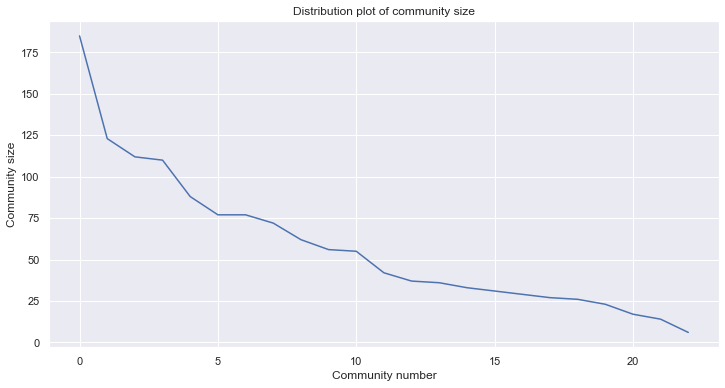

In [107]:
G_a_com_dist = list(d_a['ComNo'].value_counts())
print(("The size of the communities are: " + str(G_a_com_dist)))

plt.figure(figsize=[12,6])
plt.plot(range(len(G_a_com_dist )),G_a_com_dist)

plt.ylabel('Community size')
plt.xlabel('Community number') #not the real ComNo, but only the number om the community size.
plt.title('Distribution plot of community size')
plt.savefig('atletcomsizedist.jpg')

plt.show()

In [108]:
comthree = sum(G_a_com_dist[:3])/sum(G_a_com_dist)*100
print(f'Top three largest communities are counting for %d percent of the athletes'%(comthree))

Top three largest communities are counting for 31 percent of the athletes


On the above plot, the total number of communities are 23. Top three communities are big and stand for 31% of the athletes, and as in the large network, the curve is slowly flattening out, where only 14 and 6 athletes are in the two smallest communities. Be aware that the x-axis is not showing the real ComNo, but only the number of the community size.  

The athlete network can now be plotted with colors depending on their community. 

100%|██████████| 100/100 [00:02<00:00, 43.16it/s]


BarnesHut Approximation  took  0.72  seconds
Repulsion forces  took  1.50  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


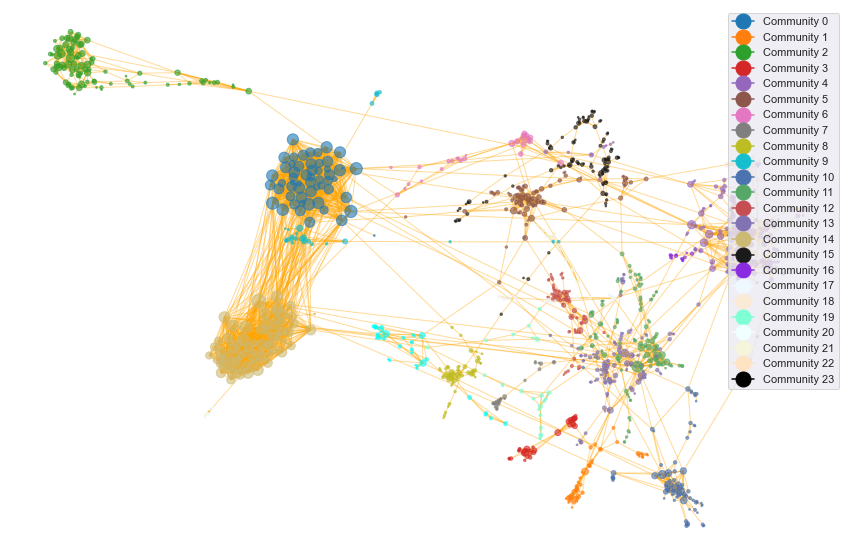

In [34]:
#Generete a list with the used colors in the network graph
node_c =[]

node_c.append(list(mcolors.TABLEAU_COLORS.keys())[0])
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[9])
node_c.append(list(mcolors.BASE_COLORS.keys())[0]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[1]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[2]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[4]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[5]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[6])    
node_c.append(list(cnames.values())[10])
node_c.append(list(cnames.values())[0])  
node_c.append(list(cnames.values())[1]) 
node_c.append(list(cnames.values())[3]) 
node_c.append(list(cnames.values())[4]) 
node_c.append(list(cnames.values())[5])
node_c.append(list(cnames.values())[6])
node_c.append('black')

#Node color
node_color = []

# for each node in the graph
for node in G_a.nodes(data=True):
    # if the node has the attribute contries
    if 0 == node[1]['ComNo']:
        
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[0])
        
    elif 1 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
    elif 2 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
    elif 3 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
    elif 4 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
    elif 5 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
    elif 6 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
    elif 7 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
    elif 8 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
    elif 9 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[9])
    elif 10 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[0]) 
    elif 11 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[1]) 
    elif 12 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[2]) 
    elif 13 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[4]) 
    elif 14 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[5]) 
    elif 15 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[6])    
    elif 16 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[10]) 
    elif 17 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[0])  
    elif 18 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[1]) 
    elif 19 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[2]) 
    elif 20 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[3]) 
    elif 21 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[4])
    elif 22 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[5]) 
    

    else:
        node_color.append('black')
        
# Node-size
G_a_Degree = [G_a.degree(i)*3 for i in G_a.nodes()]
        
        
# custom legends
legend_elements = [Line2D([0], [0], marker='o', color=node_c[0], label='Community 0',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[1], label='Community 1',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[2], label='Community 2',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[3], label='Community 3',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[4], label='Community 4',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[5], label='Community 5',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[6], label='Community 6',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[7], label='Community 7',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[8], label='Community 8',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[9], label='Community 9',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[10], label='Community 10',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[11], label='Community 11',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[12], label='Community 12',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[13], label='Community 13',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[14], label='Community 14',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[15], label='Community 15',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[16], label='Community 16',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[17], label='Community 17',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[18], label='Community 18',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[19], label='Community 19',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[20], label='Community 20',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[21], label='Community 21',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[22], label='Community 22',
                           markersize=15),
                   Line2D([0], [0], marker='o', color='black', label='Community 23',
                           markersize=15) ]
         
#Show the visualisation
plt.figure(figsize=(15,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_a, pos=None, iterations=100)
nx.draw_networkx_nodes(G_a, positions, node_size = G_a_Degree,  node_color = node_color,  alpha=0.6)
nx.draw_networkx_edges(G_a, positions, edge_color="orange",alpha=0.4)

plt.axis('off')
plt.legend(handles=legend_elements,loc='upper right')
plt.savefig('athletecom.jpg')
plt.show()
        

From the graph,  some big communities and some small ones can be seen. Especially the two dense clusters, also spotted on the above plot, is eye catching. Now it is very visual that this is two dense communities, that are also linking much to each other.

Again it will be interesting to investigate the athlete's communities and figure out why they are a community, and what the nodes insight the community might have in common. 

### Strong or week communities

A cliques in a network corresponds to a complete (fully connected) subgraph, where all the nodes are connected to each other. If a community is having many cliques, and thereby makes every node within the community have more links to each other than to other nodes outside the community, it is defined as a strong community. If the opposite occur, the community is a weak community. [ref](http://networksciencebook.com/chapter/9#basics).

Lets detect where the largest clique is in this network: 

In [35]:
#Convert to an undirected graph
# G = G.to_undirected()
cliques = list(nx.find_cliques(G_a))
max_clique = max(cliques, key=len)
sorted(cliques, key=len, reverse=True)

[['Bethanie_Mattek-Sands',
  'Venus_Williams',
  'Serena_Williams',
  'Kristina_Mladenovic',
  'Elena_Vesnina',
  'Angelique_Kerber',
  'Yaroslava_Shvedova',
  'Andrea_Petkovic',
  'Caroline_Wozniacki',
  'Kiki_Bertens',
  'Caroline_Garcia',
  'Ekaterina_Makarova',
  'Svetlana_Kuznetsova',
  'Anastasia_Pavlyuchenkova',
  'Sloane_Stephens',
  'Elina_Svitolina'],
 ['Bethanie_Mattek-Sands',
  'Venus_Williams',
  'Serena_Williams',
  'Kristina_Mladenovic',
  'Elena_Vesnina',
  'Angelique_Kerber',
  'Yaroslava_Shvedova',
  'Andrea_Petkovic',
  'Caroline_Wozniacki',
  'Kiki_Bertens',
  'Caroline_Garcia',
  'Ekaterina_Makarova',
  'Svetlana_Kuznetsova',
  'Anastasia_Pavlyuchenkova',
  'Sloane_Stephens',
  'Samantha_Stosur'],
 ['Bethanie_Mattek-Sands',
  'Venus_Williams',
  'Serena_Williams',
  'Kristina_Mladenovic',
  'Elena_Vesnina',
  'Angelique_Kerber',
  'Yaroslava_Shvedova',
  'Andrea_Petkovic',
  'Caroline_Wozniacki',
  'Kiki_Bertens',
  'Caroline_Garcia',
  'Ekaterina_Makarova',
  'Sve

Looking at the cliques in the network, we can see that some communities have many cliques whereas some communities have a few. The two communities 7 and 14, showing respectively men and woman tennis players have very strong communities, since all the biggest cligues are represented in these two communities.  
Let us see if we are right - Who is the biggest cligue? 

In [36]:
max_clique

['Bethanie_Mattek-Sands',
 'Venus_Williams',
 'Serena_Williams',
 'Kristina_Mladenovic',
 'Elena_Vesnina',
 'Angelique_Kerber',
 'Yaroslava_Shvedova',
 'Andrea_Petkovic',
 'Caroline_Wozniacki',
 'Kiki_Bertens',
 'Caroline_Garcia',
 'Ekaterina_Makarova',
 'Svetlana_Kuznetsova',
 'Anastasia_Pavlyuchenkova',
 'Sloane_Stephens',
 'Elina_Svitolina']

All 16 athletes are femal tennis players. 

#### Term Frequency distribution
Term frequency is calculated to investigate the importance of words on the athletes Wikipedia pages. This can be used to find the most common words and interpretation of the content for each athlete community. As in the large network the  *TF log normalization* is used because the wikitext for each athlete varies a lot. 

In [37]:
# Function to create the TF_lists:
def TFList(df, nodetype, ComNo):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        if df['ComNo'].iloc[i] == ComNo:
            Node = df['WikiLink'].iloc[i]                            # Open the page file
            f += io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    tf_w = copy.deepcopy(FreqWord)# Copy the dictionary
    
    # Calculate a log normalization to the frequency
    for key, value in FreqWord.items():
        w = np.log(1 + value)
        tf_w[key] = w
    
    # Return tf_w, TF and list of words:
    return tf_w, words
    

In [38]:
# Number of communities:
NC = d_a['ComNo'].nunique()

# Create the TFLIST and wordlist for all communities:
TFListCom = []
Words = []
for i in range(NC):
    TFListCom.append(TFList(d_a, 'athletes_', i)[0])
    Words.append(TFList(d_a, 'athletes_', i)[1])

The IDF and TF-IDF are calculated once again: 

In [39]:
#Function to create the TF-IDF_List for each community.
def TF_IDFList(TFList, wordList):
    
    #creating empty dictionary:
    n_t = defaultdict(int)

    #Counting n_t for each word:
    for community_word_list in wordList:
        for word in set(community_word_list):
            n_t[word] += 1
    
    # Copy dictionary:
    IDF = copy.deepcopy(n_t)
    
    # Calculate the IDF-value for each word:      
    for key, value in n_t.items():
        IDF_value = np.log(len(wordList)/(value+1))+1
        IDF[key] = IDF_value
    
    # Copy dictionary:
    TF_IDF = copy.deepcopy(TFList)
    
    # Now calculating TF-IDF by multiplying TF-value and IDF-value in the dictionary: 
    for dic in range(len(TFList)):
        for key, value in TFList[dic].items(): #looking at the TF lists
            for key1, value1 in IDF.items(): #Lokking at the IDF dict
                if key == key1: #check if the keys are equal
                    new_value = np.dot(value, value1) #Calculating the value. 
                    TF_IDF[dic][key] = new_value #replacing the value
    return TF_IDF

# Create the TF-IDF List for all communities:
TF_IDF = TF_IDFList(TFListCom, Words)



In [40]:
for i in range(NC):
    print("top 5 TF_IDF for community %d:"%i)
    print(list({k: v for k, v in sorted(TF_IDF[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

top 5 TF_IDF for community 0:
[('wta', 24.165008005625456), ('wimbledon', 20.911479107585954), ('wickmayer', 20.7844470611359), ('vinci', 20.70129453895879), ('shvedova', 19.599801948193832)]

top 5 TF_IDF for community 1:
[('lpga', 23.239634127071135), ('solheim', 18.471551627172726), ('maguire', 15.155354532002905), ('golfers', 14.851412885493426), ('evian', 14.828492913098009)]

top 5 TF_IDF for community 2:
[('bwf', 27.033496151881906), ('badminton', 24.299742630167312), ('d5d5d5', 21.433900044139346), ('superseries', 20.743121870529734), ('d8cef6', 19.481892016935472)]

top 5 TF_IDF for community 3:
[('glover', 18.719756187174372), ('stanning', 17.293940216984275), ('coxless', 16.18013084768187), ('rowing', 15.470754443624415), ('rowers', 14.18327407955352)]

top 5 TF_IDF for community 4:
[('breaststroke', 21.46774837030438), ('fina', 20.436634972925276), ('aquatics', 20.269599900003133), ('backstroke', 19.252826542515475), ('swimmers', 18.119886217286908)]

top 5 TF_IDF for commu

From fast going through the words, it seems that each community is divided by the sports they have in common. This theory will be investigated more visual by looking into each communities wordcloud. 

#### Word clouds for each community
The TF-IDF are now investtigated by plotting the word clouds.

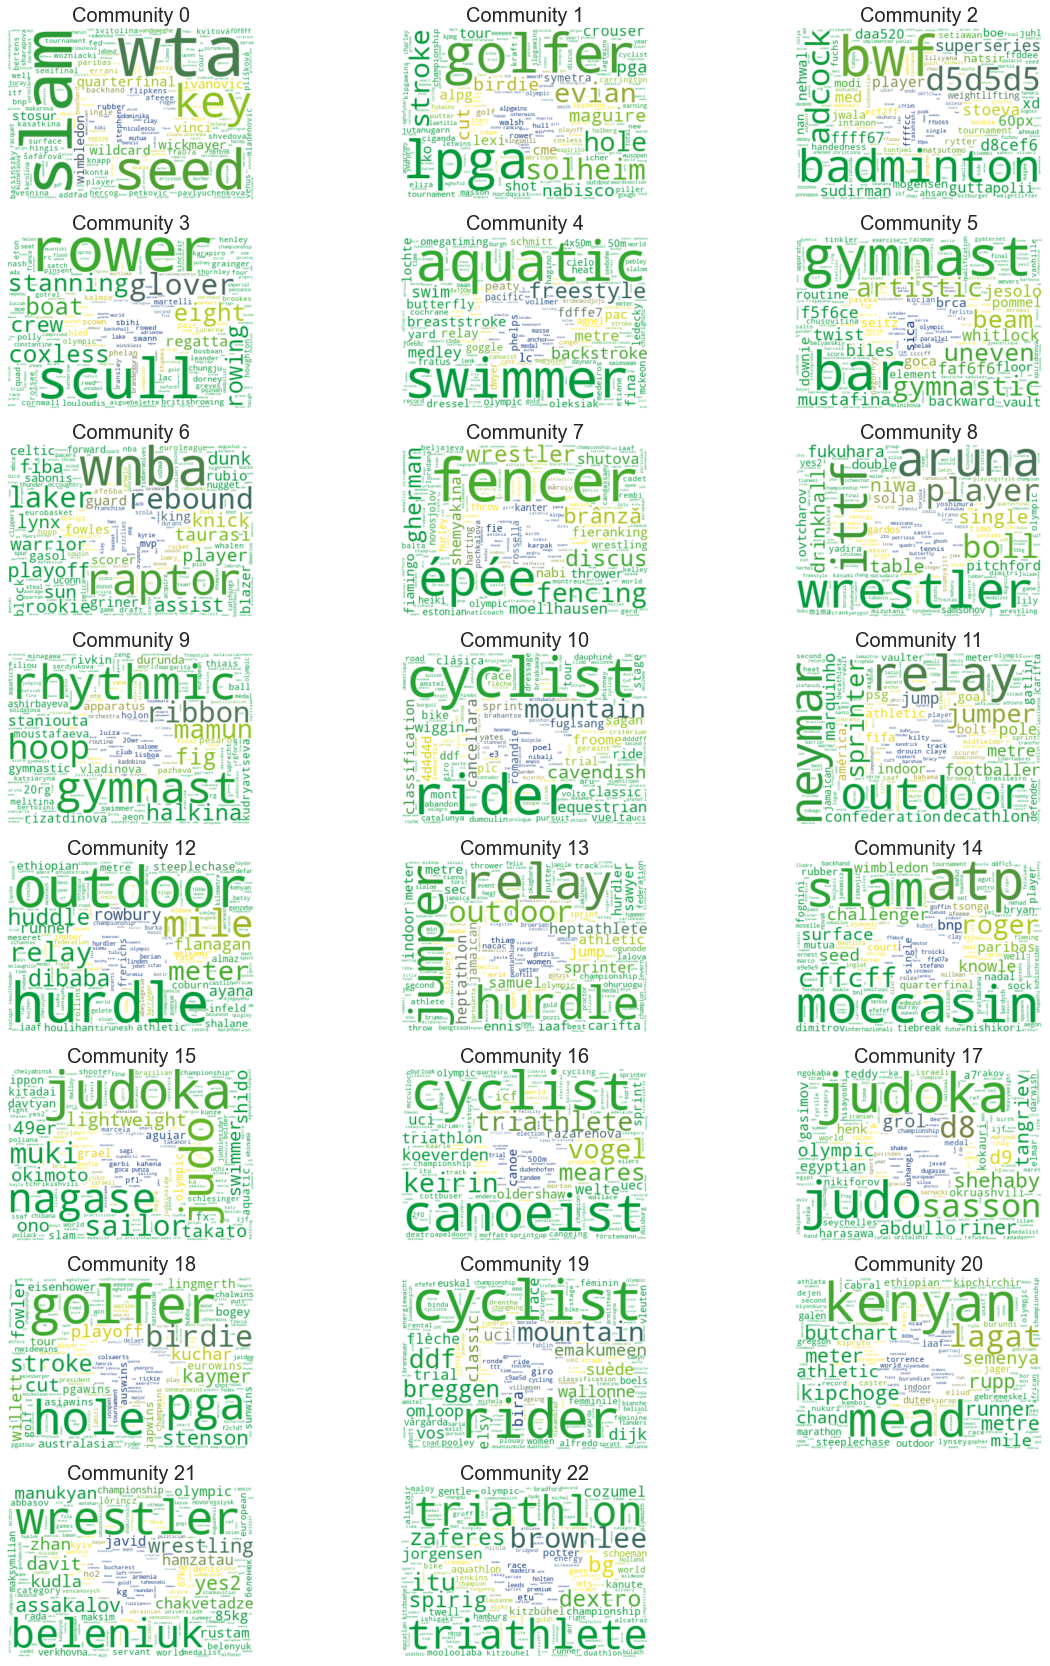

In [41]:
# word
flag = np.array(Image.open("flag.PNG"))
Communitie_WordCloudList = []
athletes_com_wordcloud = []
#Generate the wordclouds: 
for i in range(NC):
    Communitie_WordCloudList.append(' '.join([word for word in list(TF_IDF[i].keys()) for j in range(int(TF_IDF[i][word]))]))
for i in range(NC):
    athletes_com_wordcloud.append(WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 50,
                            width = 800, 
                            height = 400,
                            mask=flag,
                             
                            ).generate(Communitie_WordCloudList[i]))

# Generate a single figure
plt.figure(figsize=(20,30))
image_colors = ImageColorGenerator(flag)
for i in range(NC):
    # Display the wordcloud:
    
    plt.subplot(8,3, i+1)
    plt.imshow(athletes_com_wordcloud[i].recolor(color_func=image_colors), interpolation="bilinear", )
    plt.title('Community %d'%i,fontsize=20,ha='center')
    
    plt.axis("off")
    
plt.savefig('wordC.jpg')

Looking at the wordclouds, we can clearly see a difference in the communityes, and alrady by skimming each word cloud, we can conclude that what each community have in commen is their sport.However, some words appear in several communities like Judo which appear both in community 15 and 17.

Some of the words in the communities are names, as example glover. This is a an Olympic rower, [Helen Glover (rower)](https://en.wikipedia.org/wiki/Helen_Glover_(rower)), which won the olympic gold medal in Rio 2016. Hence she is mentined a lot in the texts of her community, that in general include the diciplin rowing (community 3) 

Looking at community 12 and 22, we can see that they both have diciplins in the "Athletics" area like running, hurdle, relay, mile, outdoor, triathlon etc. Hence they both represent Athletics.

OK. Just for the fun of it. Lets plot top four biggest communities with super cool pictures: The icons are found [here](https://icon-icons.com/download/68613/PNG/512/)**


In [74]:
#load judo picture: 
tennis = np.array(Image.open("tennis.jpg")) # judo 
golf = np.array(Image.open("golf.jpg")) # rowing
batminton = np.array(Image.open("batminton.jpg")) #athletics
row = np.array(Image.open("row.jpg")) #gymnastics

Community zero represent basically tennis. The word cloud for community zero is plotted as a tennis icon. 

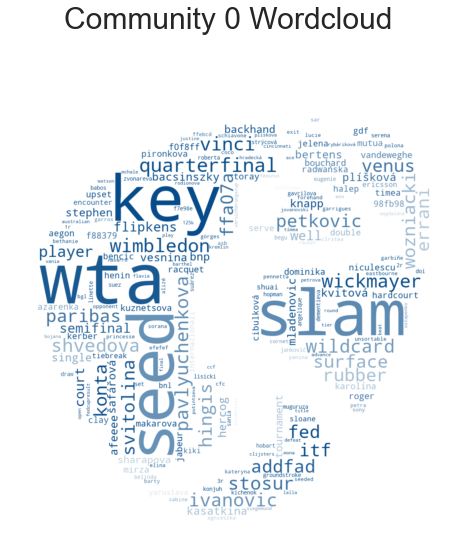

In [75]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
tennis_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=tennis
                             
                        ).generate(Communitie_WordCloudList[0])




# Display the generated images:
image_colors = ImageColorGenerator(tennis)
plt.figure(figsize=[10,8])
plt.imshow(tennis_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 0 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()


Again wta, wimbledon, slam etc are vizualised as important words in community 0.

Community 1 is plottet as the Olympic golf icon:

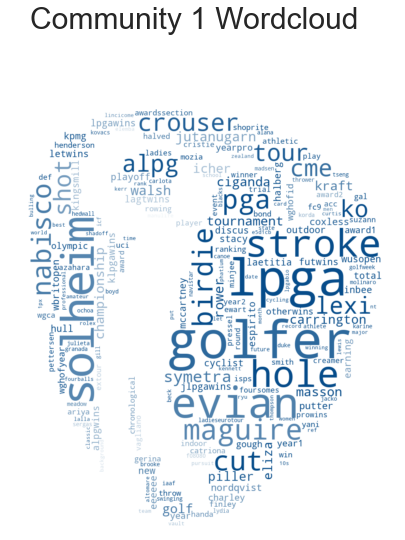

In [76]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
golf_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=golf
                             
                        ).generate(Communitie_WordCloudList[1])

# Display the generated images:
image_colors = ImageColorGenerator(golf)
plt.figure(figsize=[10,8])
plt.imshow(golf_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 1 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

Looking at community 1, the word golf apear. Hence this community is very likely containing many gold athletes.

Lets plot community 2: 

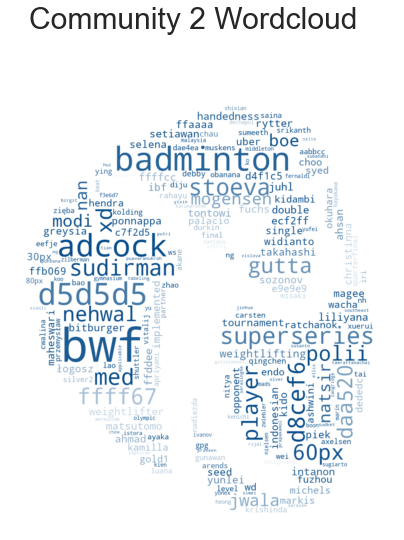

In [77]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
batminton_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=batminton
                             
                        ).generate(Communitie_WordCloudList[2])

# Display the generated images:
image_colors = ImageColorGenerator(batminton)
plt.figure(figsize=[10,8])
plt.imshow(batminton_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 2 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

In Community 2 the words bandminton and bwf (Badminton World Federation) are counted as important and hence representative for the sport badminton.

And community 3 are plottet as a rower icon word cloud:

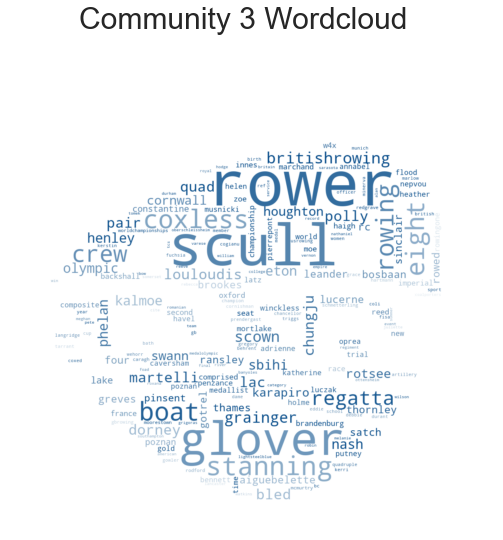

In [78]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
row_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=row
                             
                        ).generate(Communitie_WordCloudList[3])

# Display the generated images:
image_colors = ImageColorGenerator(row)
plt.figure(figsize=[10,8])
plt.imshow(row_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 3 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

Glover, and her partner Stanning are shown amongst several other rowers and words that relates to their discipline.

The above four communities are amongst the 23 communities, that were found in the athletes network. Later we will look at a bar chart, that show if we are corect in our hypothesis, that the sport defines the community.

### 3.2.1 Sentiment analysis in the Athletes Network
This section will look more into the athletes, to get to know them even better. This is done by looking at all the words from each athlete's Wikipedia page and analyze their sentiment. Maybe some athletes are described as especially negative or positive?
Furthermore, each community is investigated, to see if there are special happiness levels in the different communities. Are Sailors generally more happy than swimmers because sailors are always outside and get a lot of sun? Or is really the opposite, that swimmers, in general, are happier - maybe because they can participate in several disciplines and therefore win more medals = happier?

In [48]:
#Creating a list with the comunities as subgraphs

Com_temp = []

for i in range(len(set(partition.values()))):
    Com_temp.append(G_a.subgraph([k for k in list(partition.keys()) if partition[k]==i ]))

#Finding the degrees of each node on each graph, sorting them and printing top 3 as a name for the communities.
com_name = []
for Community_name in range(len(Com_temp)):
    comNo = str(Community_name)
    com_name.append(','.join([x[0] for x in sorted(Com_temp[Community_name].degree, key=lambda x: x[1], reverse=True)[:3]]))
#     print("Community "+ comNo + " is called "+','.join([x[0] for x in sorted(Com_temp[Community_name].degree, key=lambda x: x[1], reverse=True)[:3]]))


In [49]:
#Getting the LabMT wordlist from the weburl and saving it as wordlist
sent_data_url  = 'https://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001'
wordlist = pd.read_csv(sent_data_url,sep = '\t', header =2)

Raw count TF is calculated for each athletes page to use for the sentiment analysis: 

In [50]:
#The Term Frequency for each page is determined: 
TFpage = []
def TFListpage(df, nodetype):
    path_folder = ("./Files/")
    f = ""  
    for i in range(df.shape[0]):
         
        Node = df['WikiLink'].iloc[i]
        f  = io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read() #open the files
   
        # Remove all punctuation from your list of tokens, and set everything to lower case and remove stopwords
        tokens = word_tokenize(f)
        onlywords= [word for word in tokens if word.isalnum()]
        onlywords = [w.lower() for w in onlywords]

        stops = nltk.corpus.stopwords.words('english')
        words = [w for w in onlywords if w.lower() not in stops]

        FreqWord = nltk.FreqDist(words) #Calculate term frequency 
        
        TFpage.append(FreqWord) 
        
    return TFpage

#TF list for all the pages in athletes universe are saves as TFList_page
TFList_page = TFListpage(d_a, 'athletes_')

Raw count TF is calculated for each community to use for sentiment analysis:

In [51]:

# Function to create the TF_lists:
def TFrealList(df, nodetype, ComNo):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        if df['ComNo'].iloc[i] == ComNo:
            Node = df['WikiLink'].iloc[i]                            # Open the page file
            f += io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    
    # Return tf_w, TF and list of words:
    return FreqWord, words 

# Number of communities:
NC = d_a['ComNo'].nunique()

# Create the TFLIST and wordlist for all communities:
TFrealListCom = []
Wordsreal = []
for i in range(NC):
    TFrealListCom.append(TFrealList(d_a, 'athletes_', i)[0])
    Wordsreal.append(TFrealList(d_a, 'athletes_', i)[1])


The tokens are combined with the hapiness_average score from the wordlist by the function below.

In [52]:
def merge(tokens):
    return pd.DataFrame(tokens).merge(wordlist, on = 'word')

#### Sentiment analysis for each athlete 
The sentiment can now be calculated, by averaging the average sentiment for each page.

In [53]:

# Find the sentiment for each page 
Average_Sen_P = []
for page in range(len(d_a)):
    
    #The token_page is the tokens for each page. 
    token_page = pd.DataFrame(TFList_page[page].items())
    token_page = token_page.rename(columns = {0:'word',1:'freq'})
    
    #The sentiment_page is the tokens merge with the wordlist to get the happiness_average.
    sentiment_page = merge(token_page)
    # The sentiment is calculated and add as multiplied. 
    sentiment_page['multiplied'] = sentiment_page['freq']*sentiment_page['happiness_average']
    Average_Sen_P.append(sum(sentiment_page['multiplied'])/(sum(sentiment_page['freq'])))

#The sentiment calculations are stored to the dataframe. 
d_a['Sentiment'] = Average_Sen_P

Now a histogram over all the athletes' sentiment score is generated

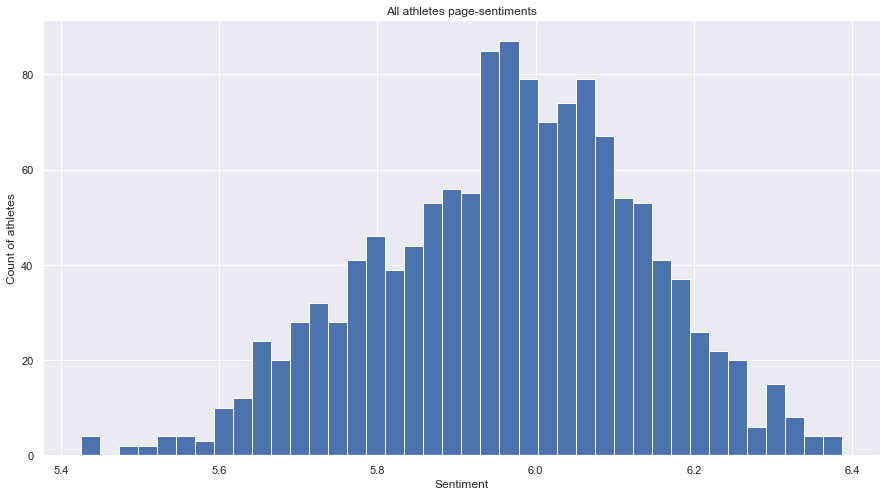

In [54]:
Min_s=int(min(d_a['Sentiment']))
Max_s = int(max(d_a['Sentiment']))

plt.figure(figsize=(15,8))
# plt.hist(d_a['Sentiment'], bins = range(Min_s, Max_s+5), color ='green')
d_a['Sentiment'].hist(bins=40);

plt.ylabel('Count of athletes')
plt.xlabel('Sentiment')
plt.title('All athletes page-sentiments')
plt.show()

Looking at the sentiment value for each athletes Wikipedia page, it can be seen that the range of the sentiment is small. This indicates that the athletes are all very much alike. It makes sense since Wikipedia is supposed to be written neutral, and that no athlete has this big drama or feeling attached to them - most of them are "just" athletes fighting to achieve their goals. Furthermore, most athletes have general facts as height, age and country as their main information. All these facts are all very neutral words. What could be interesting to see is, whether the number of "wins" determine their sentiment. 

In [55]:
wordlist.loc[wordlist['word']=='gold']

word  happiness_rank  happiness_average  happiness_standard_deviation  \
161  gold             162               7.56                        1.1095   

    twitter_rank google_rank nyt_rank lyrics_rank  
161          605        1030     1343         607

In [56]:
wordlist.loc[wordlist['word']=='silver']

word  happiness_rank  happiness_average  happiness_standard_deviation  \
1569  silver            1570               6.38                        1.9048   

     twitter_rank google_rank nyt_rank lyrics_rank  
1569         1977        1681     1774        1083

In [57]:
wordlist.loc[wordlist['word']=='bronze']

Empty DataFrame
Columns: [word, happiness_rank, happiness_average, happiness_standard_deviation, twitter_rank, google_rank, nyt_rank, lyrics_rank]
Index: []

It can be seen from the above wordlist that "Gold" has an happiness_average on **7.56** and "silver on **6.38**. Further, Bronze is not in the sentiment wordlist. This indicates that winning has a better score than "loosing" - a fun fact is that in the sports world the first loser is second place.    

Next, the top 5 athletes having the saddest pages are determined. 

In [58]:
#The top 5 athletes having the most saddest pages:
Top_Sad = d_a.sort_values(by=['Sentiment'])[:5]
Top_Sad_Ch = list(Top_Sad['name'])
Top_Sad

WikiLink  ComNo         id                name nationality  \
363       Javad_Mahjoub     17   19724524       Javad Mahjoub         IRI   
385        Adam_Cwalina      2   60265240        Adam Cwalina         POL   
9     Elisabeth_Baldauf      2  587801561   Elisabeth Baldauf         AUT   
988  David_Obernosterer      2  764731011  David Obernosterer         AUT   
518    Robert_Mateusiak      2  651788735    Robert Mateusiak         POL   

        sex      dob height weight      sport gold silver bronze  \
363    male  5/26/91   1.86    100       judo    0      0      0   
385    male  1/26/85   1.87     81  badminton    0      0      0   
9    female   8/3/90   1.75     62  badminton    0      0      0   
988    male  5/30/89   1.83     80  badminton    0      0      0   
518    male  1/13/76   1.69     65  badminton    0      0      0   

                  name2  Sentiment  
363       Javad_Mahjoub   5.425528  
385        Adam_Cwalina   5.428160  
9     Elisabeth_Baldauf   5.433588  
988  David_Obernosterer   5.440243  
518    Robert_Mateusiak   5.480607

Looking at the saddest athletes from Wikipedia, there are not any major tendency, but what can be seen is that none of them has won any medals at the Rio2016 Olympics.  Furthermore, many of them are badminton players (from the same community), which might say something about how badminton players' Wikipedia pages are built. Having a quick look, many of them have a lot of tables giving overviews of different matches. 

Most happy athletes texts on Wikipedia are investigated below:

In [59]:
#The top 5 characters having the most happy pages:
Top_Hap = d_a.sort_values(by=['Sentiment'], ascending=False)[:5]
Top_Hap_Ch = list(Top_Hap['name'])
Top_Hap

WikiLink  ComNo         id               name nationality  \
613     Nadiya_Dusanova     13  228904239    Nadiya Dusanova         UZB   
817     Kanako_Watanabe      4  274674975    Kanako Watanabe         JPN   
80    Svetlana_Radzivil     13   82177310  Svetlana Radzivil         UZB   
1189     Madison_Wilson      4  540102843     Madison Wilson         AUS   
165    Shericka_Jackson     13  225168499   Shericka Jackson         JAM   

         sex       dob height weight      sport gold silver bronze  \
613   female  11/17/87   1.74     56  athletics    0      0      0   
817   female  11/15/96   1.67     60   aquatics    0      0      0   
80    female   1/17/87   1.86     61  athletics    0      0      0   
1189  female   5/31/94   1.79     61   aquatics    1      1      0   
165   female   7/16/94   1.73     61  athletics    0      1      1   

                  name2  Sentiment  
613     Nadiya_Dusanova   6.387151  
817     Kanako_Watanabe   6.377992  
80    Svetlana_Radzivil   6.376445  
1189     Madison_Wilson   6.369713  
165    Shericka_Jackson   6.363063

Looking at the athletes with the highest sentiment, only females are presented and they are all from athletics and aquatics. More medals are also won from these athletes. The theory of sailors being more happy than swimmers because of outdoor life and sun, seems not to hold true. What really matters for these athletes are medals.

#### Sentiment for each community: 

In [60]:
sent_by_comno = d_a.groupby('ComNo')['Sentiment'].mean()
sent_by_comno = sent_by_comno.sort_values()

Lets plot the sentiment values as a barh chart.

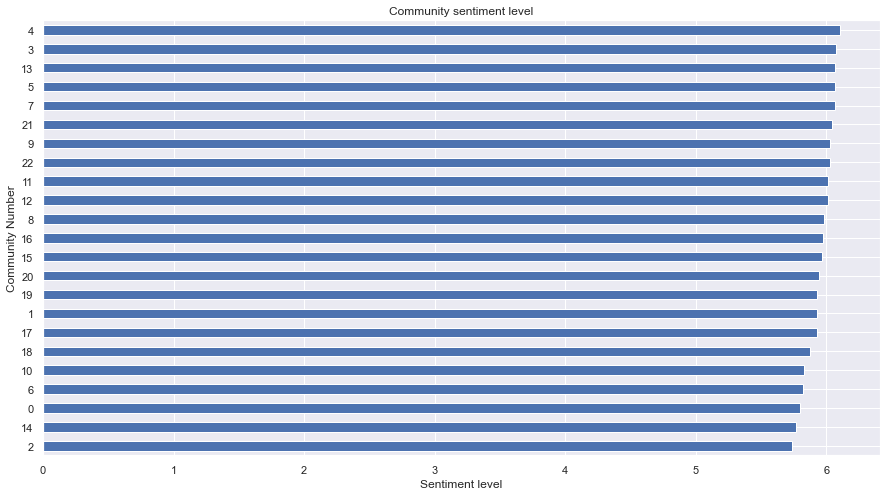

In [61]:
plt.figure(figsize=(15,8))
sent_by_comno.plot(kind= 'barh' )
plt.ylabel('Community Number')
plt.xlabel('Sentiment level')
plt.title('Community sentiment level')
plt.show()

Like in the athlete's sentiment analysis all communities also have a very similar range of sentiment. This indicates, that no matter what community you belong to, the sentiment level is about the same. 

## 3.3 Exploratory Analysis of Atheletes <a class="anchor" id="3.3"></a>
This section will be based on the dataframe *d_a* that was created from the above analysis. Here the athlete will be explored with new knowledge. The main focus of this section is to explore the athletes regarding communities and medals. 

Firstly, a new columns #medals with the total number of medals won for each athlete are created:

In [80]:
#Have to convert gold, silver and bronze to nummeric values: 
d_a[['gold', 'silver','bronze']] = d_a[['gold', 'silver','bronze']].apply(pd.to_numeric)
#Create extra column where they are added together:
d_a['#medals']= ((d_a['gold']) + (d_a['silver']) + (d_a['bronze']) )
d_a.head()

WikiLink  ComNo         id              name nationality     sex  \
0  Kirsten_Flipkens      0  580208102  Kirsten Flipkens         BEL  female   
1     Dylan_Kennett      1  965509678     Dylan Kennett         NZL    male   
2  Lohaynny_Vicente      2   92285054  Lohaynny Vicente         BRA  female   
3   Meghan_Musnicki      3   26643473   Meghan Musnicki         USA  female   
4  Arina_Openysheva      4  197129425  Arina Openysheva         RUS  female   

       dob height weight      sport  gold  silver  bronze             name2  \
0  1/10/86   1.65     59     tennis     0       0       0  Kirsten_Flipkens   
1  12/8/94   1.78     75    cycling     0       0       0     Dylan_Kennett   
2   5/2/96   1.68     70  badminton     0       0       0  Lohaynny_Vicente   
3   2/5/83   1.83     73     rowing     1       0       0   Meghan_Musnicki   
4  3/24/99   1.68     59   aquatics     0       0       0  Arina_Openysheva   

   Sentiment  #medals  
0   5.803672        0  
1   6.013480        0  
2   5.534263        0  
3   6.323676        1  
4   6.140954        0

**Basic data cleaning of the dataframe**    
The data types for the dataframe are investigated. It shows that the data types for height and weight are object these should be changed to numeric. Further, ComNo are changed to a string.


In [81]:
d_a.dtypes

WikiLink        object
ComNo            int64
id              object
name            object
nationality     object
sex             object
dob             object
height          object
weight          object
sport           object
gold             int64
silver           int64
bronze           int64
name2           object
Sentiment      float64
#medals          int64
dtype: object

In [82]:
d_a['height']=pd.to_numeric(d_a['height'])
d_a['weight']=pd.to_numeric(d_a['weight'])
d_a['ComNo']=d_a['ComNo'].astype(str)

**Investigation of the variables**   
Next, the correlation between the variables are investigated to see if any interesting relationships are present. 

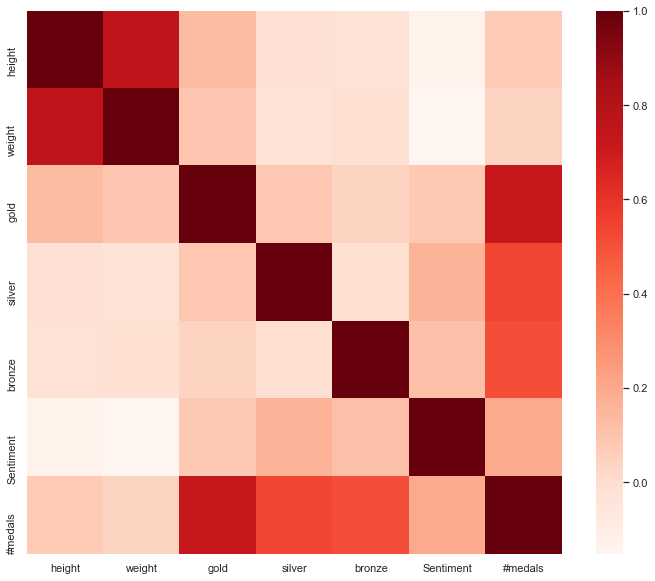

In [83]:
cor = d_a.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

The above heatmap shows that *#medals* are strongly correlated with *gold, silver* and *bronze*. It makes sense since medals are created upon these three variables. Further a strong relationship between weight and height are seen. By intuition, this makes somewhat sense since typically if you are higher you weight more. The question is if this also is the typical things concerning athletes? To answer the question, two scatterplots are plotted below. 

The first scatterplot shows the relationship between height and weight for each variable. Meaning that each dot represents an athlete. The colors indicate which community the athlete belongs to, and the size of the nodes is how many medals they have won at the Rio2016 Olympics. 

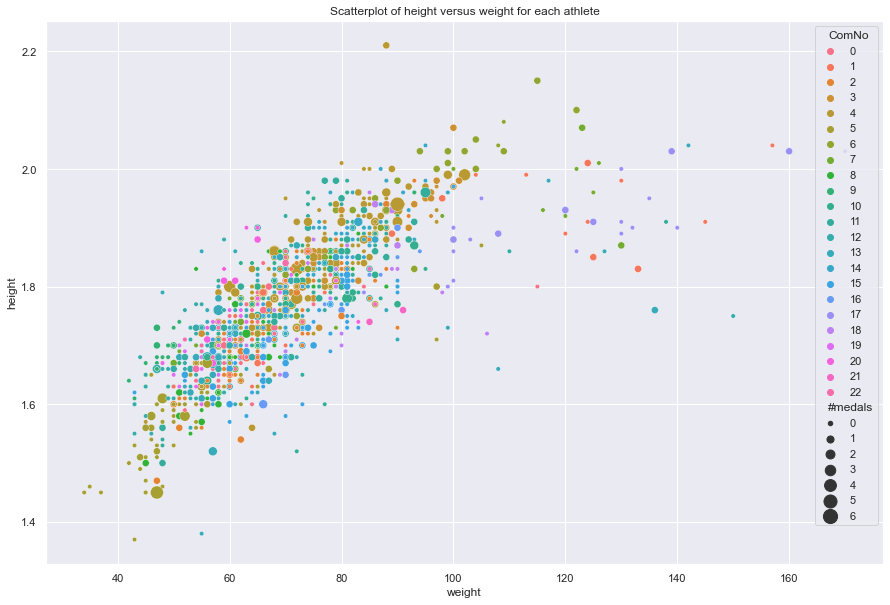

In [84]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=d_a, x="weight", y="height", hue="ComNo", size="#medals", sizes=(20, 200))
plt.title('Scatterplot of height versus weight for each athlete')
plt.show()

From the above plot, the general relationship between weight and height for each athlete are seen. The color show which community each athlete are in. In general, the communities are spread out. The main reason could be that communities contain both genders. Further, the reason for the large range of height and weight is because each sport requires different body types to be at the top. The node size for each athlete indicates the total number of medals. It can be seen that some athlete is winning many medals, some few and others none. The reason apart from hard work and talent are that some sports have many disciplines to compete in while in other sports it is only possible to win one medal. Below one athlete is pointed out, the athlete has a low weight and height and won many medals. 

In [85]:
Winners = []
for i in range(len(d_a)):
    if d_a['weight'][i]<60 and d_a['#medals'][i]>4:
        Winners.append(d_a.iloc[i])
Winners

[WikiLink       Simone_Biles
 ComNo                     5
 id                770111957
 name           Simone Biles
 nationality             USA
 sex                  female
 dob                 3/14/97
 height                 1.45
 weight                   47
 sport            gymnastics
 gold                      4
 silver                    0
 bronze                    1
 name2          Simone_Biles
 Sentiment           6.03617
 #medals                   5
 Name: 903, dtype: object]

In [5]:
IFrame("https://en.wikipedia.org/wiki/Simone_Biles", width = 1000, height = 400)

From the above, it can be seen that Simone Biles is a winning athlete within gymnastics. This could indicate that community 5 also include athletes within the gymnastic area where low weight and height are an advantage. To give a more clear picture of how weight and heights are influence by gender the below scatter plot is generated. 

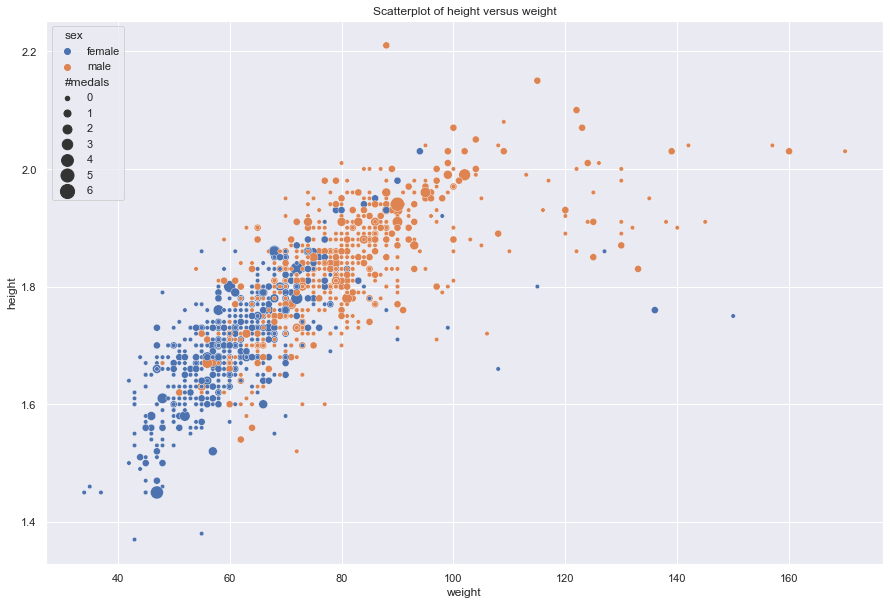

In [87]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=d_a, x="weight", y="height", hue="sex", size="#medals", sizes=(20, 200))
plt.title('Scatterplot of height versus weight')
plt.show()

In general men have higher weight and heights. There are some outliers for both men and women were some are very high with extremely low weight and vice versa. To point out one of these outliers a female with high weight compared to her height is chosen. Further, she has won 1 medal at the Olympics. 

In [88]:
Winners = []
for i in range(len(d_a)):
    if d_a['weight'][i]>130 and d_a['#medals'][i]>0  and d_a['sex'][i]=='female':
        Winners.append(d_a.iloc[i])
Winners

[WikiLink       Michelle_Carter_(athlete)
 ComNo                                 13
 id                             970855976
 name                     Michelle Carter
 nationality                          USA
 sex                               female
 dob                             10/12/85
 height                              1.76
 weight                               136
 sport                          athletics
 gold                                   1
 silver                                 0
 bronze                                 0
 name2                    Michelle_Carter
 Sentiment                        5.98349
 #medals                                1
 Name: 421, dtype: object]

In [6]:
IFrame("https://en.wikipedia.org/wiki/Michelle_Carter_(athlete)", width = 1000, height = 400)

From the above, it can be seen that Michelle Carter is a winning athlete within Athletics. This could indicate that community 13 contain athlete within the same area. Athletics is one of the sports with many very different disciplines that requires a totally different physical appearance. This is expressed in the community scatterplot, where this community is more spread out. Further, the other outliers with high weight and low height are within this community. 


**Explore the athlete's community**   
In this section, the athlete's communities are more broadly investigated. 

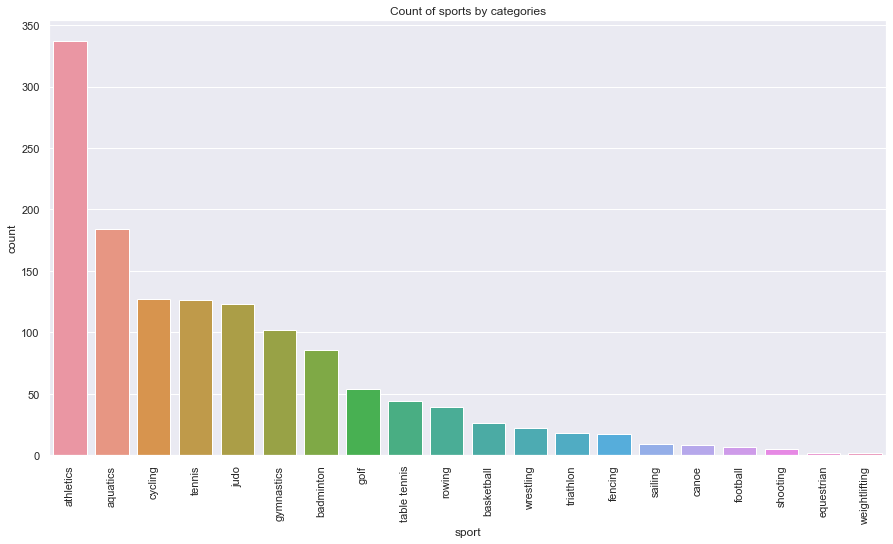

In [95]:
plt.figure(figsize=(15,8))
plt.title("Count of sports by categories")
plt.xticks(rotation='vertical')
ax = sns.countplot(x="sport",data=d_a, order = d_a['sport'].value_counts().index)

Athletics and aquatics are the two sports with the highest number of participating athletes. This could be due to the many different disciplines that are within the two sports.  Below each community is divided into the different sports categories that are within the community. 

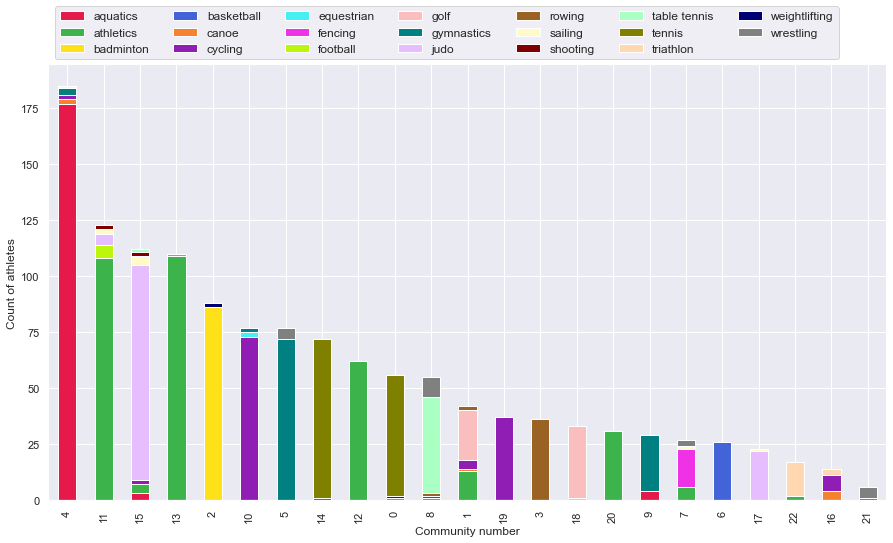

In [96]:
colorsSport = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
order2 = d_a['ComNo'].value_counts().index
df_plot = d_a.groupby(['ComNo', 'sport']).size().reset_index().pivot(columns='sport', index='ComNo',values = 0)
plot = df_plot.reindex(order2).plot(kind='bar', stacked=True, figsize=(15,8), color=colorsSport)
plt.legend(ncol=7, bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium', frameon=True)
#plot.set_facecolor('lightgrey')
#plot.set_edgecolor('grey')
plot.set_xlabel("Community number")
plot.set_ylabel("Count of athletes")
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['left'].set_visible(False)

In general most of the communities are dominated by one sports category. It gives a picture that the sport is defining the communities. This makes somewhat sense since the communities are built upon links on the athletes Wikipedia pages. Further interpretation of the stacked bar chart is dived into the following three subconclusions:  

*Interpretation of the two largest sports categories,  athletics and aquatics:*  
The largest community number 4 are mostly containing aquatics, whereas community 11, 13, 12,1, 29, 7 and 22 contains athletics. Meaning that athletics are more spread out into several communities. This only amplifies that athletics contains many different disciplines that not necessarily link to each other. 


*What about Simone Biles and Michelle Carter?*   
Simone Biles are in community number 5 which seems to mainly include gymnast. Another community including gymnast are number 3. A plausible reason could be that gender divides the two communities, meaning that female gymnast mainly links to other female gymnasts on their Wikipedia page. Michelle Carter is part of community 13 that are dominated by athletics. In general, athletics are more spread out as mentioned above. 

*Comparing with the word clouds in section 3.2*   
The interpretation of the word clouds for the athlete's community (section 3.2) are that community 0 seems to include tennis player, community 1 golf players, community 2 badminton players and lastly community 3 containing rowers. If comparing this with the above stacked bar chart it can be seen that community 0 indeed are dominated by tennis athletes. Further community 1 is a more mixed community but still, most of the athletes are golf players. Community 2 are dominated by badminton players and community 3 consists only of rowers.  
  

Below the medals for each community are investigated. 

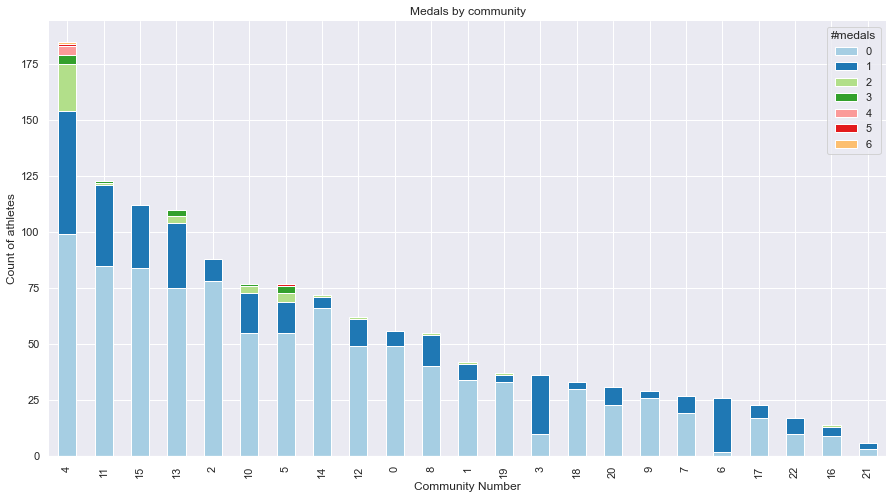

In [97]:
MedalsColors =sns.color_palette("Paired")
order2 = d_a['ComNo'].value_counts().index
df_plot = d_a.groupby(['#medals', 'ComNo']).size().reset_index().pivot(columns='#medals', index='ComNo',values = 0)
plot = df_plot.reindex(index = order2).plot(kind='bar', stacked=True, figsize=(15,8), title ='Medals by community', color = MedalsColors)
plot.set_xlabel("Community Number")
plot.set_ylabel("Count of athletes")
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['left'].set_visible(False)

It can be seen that mainly community 4 and 5 contains athletes that have won many medals. Community 4 are mainly aquatics where as an example swimming gives the opportunity to win many medals, see example [Michael Phelps](https://en.wikipedia.org/wiki/Michael_Phelps
). Community 5 are mainly gymnast where there is also an opportunity for winning several medals, just take a look at [Simone Biles](https://en.wikipedia.org/wiki/Simone_Biles. Many other sports does not have the opportunity to win more than one medal. 

Furthermore, all of the communities are winning medals. 

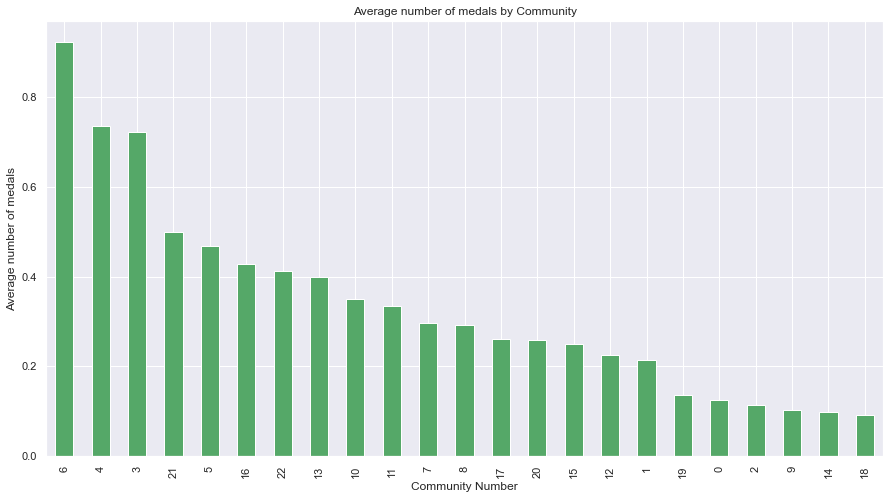

In [98]:
Number_of_medals_com = d_a.groupby('ComNo')['#medals'].mean()
Number_of_medals_com = Number_of_medals_com.sort_values(ascending= False)
plt.figure(figsize=(15,8))
Number_of_medals_com.plot(kind= 'bar', color = 'g', )
plt.ylabel('Average number of medals')
plt.xlabel('Community Number')
plt.title('Average number of medals by Community')
plt.show()

If looking at the average number of medals, community 6 takes the lead. This community mainly consist of basket players. Basket is a team sport, meaning that if a team win everybody gets a medal, it is therefore obvious that this sport will have a high average number of medals. Community 4 contain many athletes that have won more than one medals, hence this community average number is also high. 

<hr style="border:0.5px solid gray"> </hr>

# 4. Discussion

This project has investigated the big Olympic network and how the athletes, countries, and sports are connected through their Wikipedia pages. The scraping of the Wikipedia pages was easier said than done, but after processing the data, we still managed to get a large network with approximately 50% of the athletes and even a better share of the countries and sports participating at the Olympic Games in Rio 2016.

The athletes that were not present in the network was because they either did not have a Wikipedia page or the name in the dataset from Kaggle was different from the name on their Wikipedia page. The losses of these athletes affect the final results and if time had not been limited, more data cleaning processes could have been done to include the missing athletes. However, it is still seen as a sufficient network for this report.

When investigating the Wikipedia pages for all the nodes, patience was needed. The running time for calculating the TF-IDF for the entire network was long. This could have been improved by optimizing the calculation. Already when using the TF log normalization instead of the raw count, the running time was significantly improved. Since the log transformation of the counts is creating TF values that are much smaller than the raw count, this makes sense. Other versions of IDF would have been interesting to try out. However, the long running time made it difficult to test. The decision of performing further analysis on the athlete's subgraph was essential due to this issue. When limiting the network analysis to the athletes network, and hence limiting the number of nodes, the performance of this calculation increased. 

Another critical aspect was the importance of all the nodes. If more knowledge had been obtained about the network beforehand, the nodes representing the sport should maybe not have been a part of the network. They did not have any incoming links, and they are not linking to each other. Hence not a very exciting or informative category of nodes. However, they were still interesting to detect, since they gave inspiration to the investigation of the communities and the hypothesis that the communities were reflecting the sport that the athletes competed in at the Olympic Games. 

The word clouds performed for the big Olympic network was difficult to interpret. This is caused by the fact, that scraping three different kinds of Wikipedia is complex. When calculating TF-IDF, the IDF should weigh important words heavier than non-important words.  Wikipedia have quite generic ways of building their pages, depending on the theme – is it a country, a person, or a sport? The pages are created differently. As an example, and what became clear in the big Olympic network, was that Country and athletes' Wikipedia pages are built differently, especially concerning the date of birth. Countries are having a list of all the athletes and some data about them presented as a table, where one column name is *date of birth*. The Wikipedia page for each athlete are also showing the date of birth, but are using the word *born*. Hence birth is counted as more important than born since only 10% of the pages are countries. If more time was given, words like birth should have been removed like stop words are removed. 

Overall, the word clouds when analyzing the athletes’ network were performing well. It was easy to interpret the main sport of the community.  It should be noted that the community reflects on links from an athlete to another athlete on Wikipedia, hence it makes sense that athletes playing matches against each other are in the same community, since they probably link a lot to each other.

Wikipedia has been a great source to determine the network of the sports, country, and athlete competing in the Olympics. It has also been somewhat useful for detecting the communities and to find the theme of each community.
Whereas when it comes to investigating the sentiment analysis on the athletes, the results were vague. Wikipedia is a neutral source, and it makes sense that there was not much sentiment difference to find. Instead of investigating sentiment more in depth the medals were explored, on behalf of the hypothesis that medals make athletes “happier”.  An improvement to the analysis would have been to instead include autobiographies of the athletes. This could have provided a more nuanced perspective of their life, challenger, success and therefore give a more realistic picture of their "happiness" or "sadness". An example of such page is given, where the autobiographies are explaining the journey for Michael Phelps (Most winning swimmer seen alive) ([source](https://www.biography.com/athlete/michael-phelps)). This approach could be difficult because not many athletes have a biography like this, and for those athletes who do, it might not be free of charge. 

Another approach would be to investigate the athletes' Twitter profiles or even their fans' profiles. This could give a more real-life picture of how the athletes life is today through their tweets.

This project's results are presented on a GitHub webpage. Creating webpages was a first-timer and the goal was to create it informative but playful for the end-user. The informative part went well, the playful part was hard but reached a decent level.


Finally, we can conclude that Network science is useful in many cases with much data available. The Network theories have been enlightening when detecting the Olympic Games and its participants.


# Contribution 

This project has been a great collaboration between all of the group. We started by brainstorming all together, finding the best topic that was in everyone's interest. A Network was found, and we distributed the tasks to get efficient. We started by finding the data on Kaggle and Mie became responsible for data cleaning and scraping of the Wikipedia pages with great contributions from Julie og Katja. Katja and Julie started the Video project and everyone contributed to the facts and findings in the video. The Network analysis was done equally in shifts, Mie starting the big Olympic Network analysis first by the preliminary analysis and investigation followed by the in depth network analysis. Julie and Katja taking the subgraph analysis, first by analyzing the network and then analyzing communities, sentiment, and further the more specific data of the athletes. Everyone took a great share in writing the notebook. In the end, the Github page was created, with everyone contributing to the best possible solution. All and all, great work, great collaboration where everyone contributed equally, and a super fun challenge 😃